### Abstract:



Maternal health is a critical aspect of healthcare, particularly in rural areas where access to medical facilities and timely interventions can be limited. This project aims to predict maternal health risks using machine learning algorithms, by analyzing and training different ML models including Decision Tree Learning, Random Forests, K-Nearest Neighbors (KNN), Naïve Bayes, Support Vector  Machines (SVM), and Artificial Neural Networks (ANN), on a dataset that contains information gathered from multiple health facilities in rural Bangladesh using special internet-connected devices that track health risks. The dataset comprises 1013 instances with six key features: Age, Systolic Blood Pressure (SystolicBP), Diastolic Blood Pressure (DiastolicBP), Blood Sugar (BS), Body Temperature (BodyTemp), and Heart Rate.

Each algorithm was evaluated based on its predictive performance and accuracy. This comparative analysis provides insights into the strengths and weaknesses of each method, helping to identify the most effective approach for early detection and intervention of maternal health risks. Our findings aim to contribute to the broader goal of reducing maternal mortality, aligning with the Sustainable Development Goals (SDGs) set by the United Nations.


# instalation

In [ ]:
pip install ucimlrepo

# Import all the necessary libraries for the project.

In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np
# For dataset fetching
from ucimlrepo import fetch_ucirepo
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# For data preparation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# For machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
# For grid search
from sklearn.model_selection import GridSearchCV
# For decision tree visualization
from sklearn.tree import export_text
# For
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# For SVM model
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
# For naive bays
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
# For adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import KBinsDiscretizer
# For ANN
import tensorflow as tf
from scipy import stats
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


# 1. Data Description


**Fetch dataset, and display its information and details**

In [ ]:
maternal_health_risk = fetch_ucirepo(id=863)

X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets

print(maternal_health_risk.metadata)
print(maternal_health_risk.variables)

{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors': 'Marzia Ahmed, M. A. Kashem,

.

**Define and display a dataFrame for the dataset**

In [ ]:
maternal_health_risk_df = pd.concat([X, y], axis=1)
maternal_health_risk_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


.

#### **Dataset details:**

- **Name:** Maternal Health Risk

- **Number of Instances:** 1013 (data points)

- **Number of Features:** 6 including:
    - Age: quantitative discret (years)
    - SystolicBP (Upper value of Blood Pressure): quantitative discret (mmHg)
    - DiastolicBP (lower value of Blood Pressure): quantitative discret (mmHg)
    - Blood Sugar: quantitative continuous (mmol/L)
    - Body Temperature: quantitative discret (°F)
    - Heart Rate: quantitative discret (bpm)

- **Target Variable:** RiskLevel (categorical, indicating predicted risk intensity during pregnancy)

- **Year of Creation:** 2020

- **Abstract:** The data is collected from rural Bangladesh using an IoT-based risk monitoring system.

   **Variable Information:**

  The table shows details about each variable, including its name, role (feature or target), type (integer or categorical), and if it represents a demographic factor (like Age).
  
  There are descriptions and units for each feature (e.g., Age in years, Blood Pressure in mmHg).


#### **Description for each feature**

In [ ]:
print(maternal_health_risk_df.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


# 2. Data Visualization


## Histograms

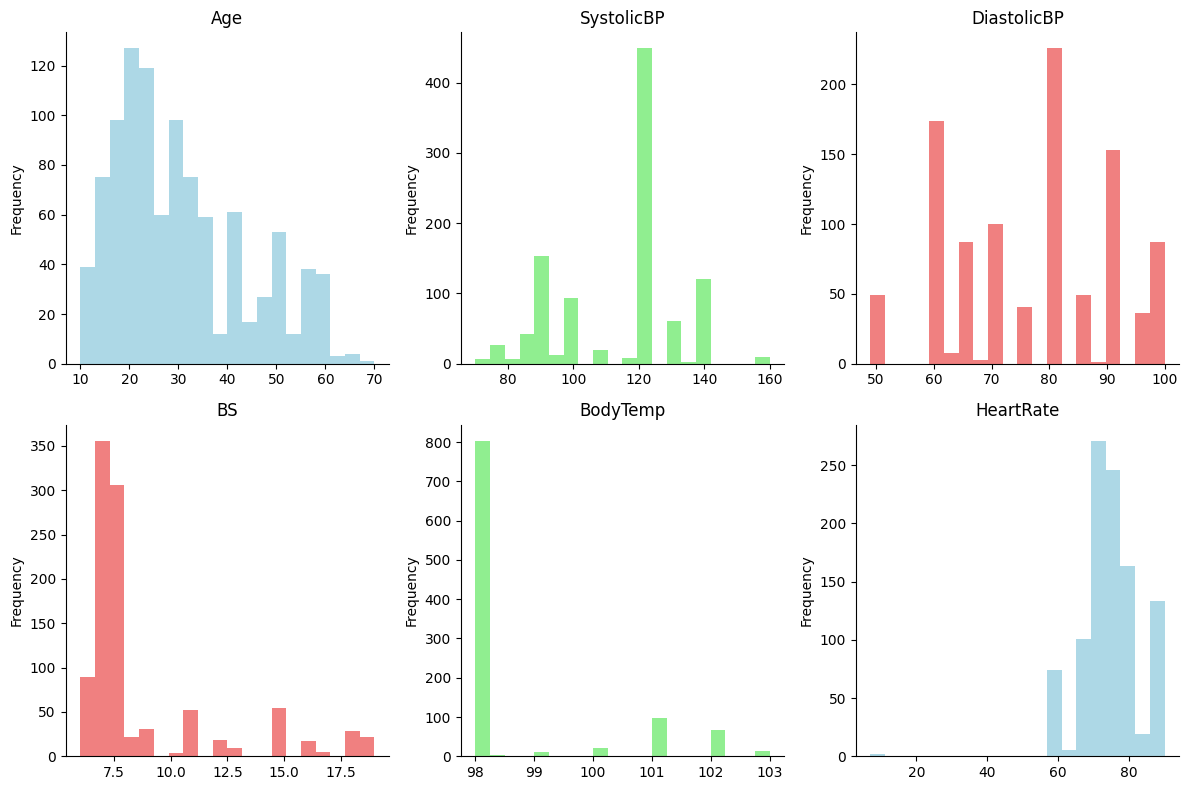

In [ ]:
numerical_features = maternal_health_risk_df.select_dtypes(include=['int64', 'float64'])
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcoral', 'lightgreen', 'lightblue']
num_bins = 20
plt.figure(figsize=(12, 8))

for i, (feature, clr) in enumerate(zip(numerical_features, colors)):
    plt.subplot(2, 3, i+1)
    maternal_health_risk_df[feature].plot(kind='hist', bins=num_bins, title=feature, color=clr)
    plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

- **Comment**

  - **Age:** it ranges from 10 to 70, Ages between 19 and 23 are the most repeated age range. The histogram is right-skewed.

  - **SystolicBP:** it ranges from 70 to 160, the value that has the max frequency (the mode) is 120 which is considered normal. The other values have much lower fraquencies.
  
  - **DiastolicBP:** it ranges from 49 to 100, the value that has the max frequency (the mode) is 80 which is considered normal. The other values have much lower fraquencies, except 60 (that is considered within the normal range) and 90 (that is  is considered elevated) that have relatively high values.

  - **Blood Sugar (BS):** Ranges from 6 to 19, the majority of the values are less than 7.5, that is generally considered to be within the normal range for a person without diabetes.

  - **Body Temperature (BodyTemp):** Goes from 98 to 103, but almost all the data points has 98°F that is the normal temperature for a normal person. with some exceptions that have higher temperature.

  - **Heart Rate (HeartRate):** ranges from 55 to 90, the majority fall in the range of 60 to 80 that is the normal rate, with a significant number of instances with 55 that is a little bit low, and a significant number of 90 that is a little bit high.

## Box Plots

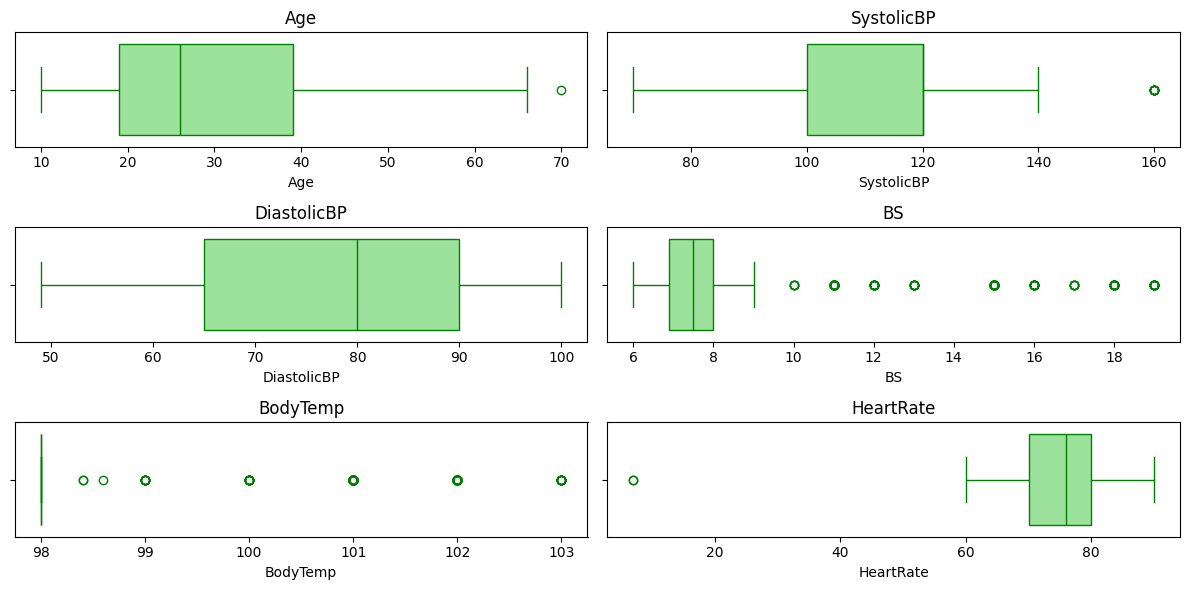

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 6))

descriptive_features = maternal_health_risk_df.columns[:-1]

for i, feature in enumerate(descriptive_features):
    row, col = divmod(i, 2)
    sns.boxplot(
        x = feature,
        data = maternal_health_risk_df,
        ax = axes[row, col],
        color='lightgreen',
        linecolor='green'
    )
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

- **Comment**
  - BS and BodyTemp seem to have so mmany outliers
  - SystolicBP and HeartRate have a few number of outiers (maybe unsignificant)
  - Without considering the outliers, we see that some features seam to be centrlized like BS and BS and BodyTemp and HeartRate.

## Heatmap (for correlation between dataset variables)

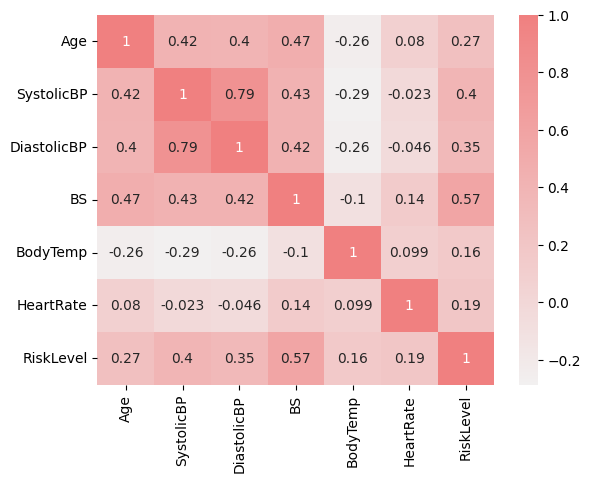

In [ ]:
maternal_health_risk_df_num_lvl = maternal_health_risk_df.copy()
maternal_health_risk_df_num_lvl['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
maternal_health_risk_df_num_lvl['RiskLevel'] = maternal_health_risk_df_num_lvl['RiskLevel'].astype(float)
pastel_palette = sns.light_palette("lightcoral", as_cmap=True)
plt.figure()
sns.heatmap(maternal_health_risk_df_num_lvl.corr(), annot=True, cmap=pastel_palette)
plt.show()

This correlation matrix shows the correlation coefficients between different features in your dataset. Here's its interpretion:

- **Correlated Features:**

SystolicBP and DiastolicBP have a correlation coefficient of 0.79, we can say that they have a strong positive correlation.

Blood Sugar (BS) and RiskLevel have a correlation coefficient of 0.57, indicating a moderate positive correlation.

- **Features with Weak or No Correlation:**

All other cobinations have small correlation coefficients, which means that the features have weak correlations, or not at all for those that are near to 0.

-The lowest correlation coefficients:

HeartRate and DiastolicBP have a correlation coefficient of -0.046, indicating a weak negative correlation.

HeartRate and SystolicBP have a correlation coefficient of -0.023, indicating a very weak correlation.

## Target Levels Distribution

- Bar chart

<ipython-input-23-06059b34f80e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', palette=colors, data=maternal_health_risk_df, order=level_order)


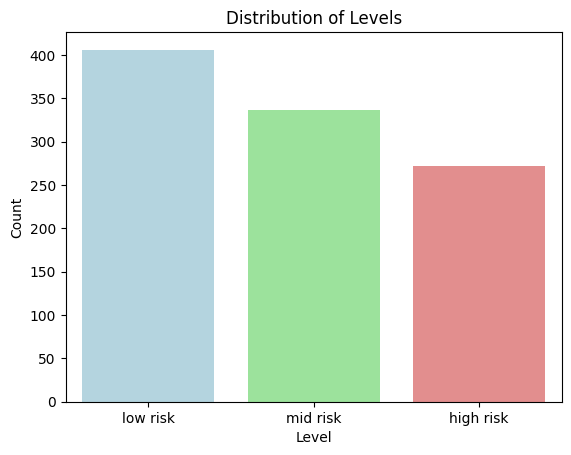

In [ ]:
level_order = ['low risk', 'mid risk', 'high risk']
colors = ['lightblue', 'lightgreen', 'lightcoral']
sns.countplot(x='RiskLevel', palette=colors, data=maternal_health_risk_df, order=level_order)
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

- Pie Chart

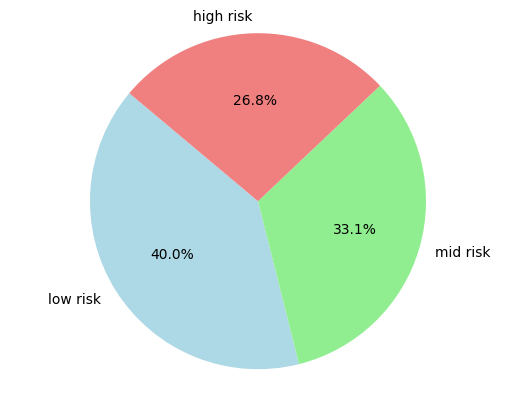

In [ ]:
level_counts = maternal_health_risk_df['RiskLevel'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightcoral']
labels = ['low risk', 'mid risk', 'high risk']
plt.pie(level_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

- Comment

We can observe an unstability in the distribution of the target levels, with high pourcentage of low risk class, and low pourcentage of high risk pourcentage.

This can be addressed using data augmentation with SMOTE later in the data preparation section.

# 3. Data Preparation

## Data Cleaning

### Finding and handling missing values

In [ ]:
missing_values = maternal_health_risk_df.isna()
print(maternal_health_risk_df[missing_values.any(axis=1)])

Empty DataFrame
Columns: [Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, RiskLevel]
Index: []


- that there are no missing values in the dataset.

### Finding and handling outliers

- We use Box-Plots and IQR method

In [ ]:
""" We define a function that calculates the number of outliers for a feature using IQR method. """
def count_iqr_outliers(df, feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
  return len(outliers)


for feature in maternal_health_risk_df.columns[:-1]:
  num_outliers = count_iqr_outliers(maternal_health_risk_df, feature)
  print(f"Feature: {feature}, Number of outliers (IQR method): {num_outliers}")


Feature: Age, Number of outliers (IQR method): 1
Feature: SystolicBP, Number of outliers (IQR method): 10
Feature: DiastolicBP, Number of outliers (IQR method): 0
Feature: BS, Number of outliers (IQR method): 210
Feature: BodyTemp, Number of outliers (IQR method): 210
Feature: HeartRate, Number of outliers (IQR method): 2


- These results suggest a significant number of outliers in Blood Sugar (BS) and Body Temperature features. For now, we won't do anything, since these outliers may play a significant role in the predictions, but we'll keep this in mind as we move forward and may need to revisit outlier handling strategies depending on the behavior of the machine learning models.

### Finding and handling duplicates

In [ ]:
duplicate_rows = maternal_health_risk_df[maternal_health_risk_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicate_rows

Duplicate Rows except first occurrence based on all columns are :


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


- Over half of our data comprises duplicates, where different women share identical measures and classes.

- These duplicates validate specific combinations, potentially beneficial for certain algorithms.

- However, for others, their removal might enhance performance (as we can see later on with Naive Bayes and SVM).

- To accommodate both needs, we suggest creating a duplicate-free copy later on, when needed (see Naive Bayes section).

## Feature Ingeneering

### Transforming BodyTemp into a binary attribute

We observed previously in the histogrames and boxplots and data discription, that the TempBody feature can be splitted into 2 categories:
- Normal: with temp = 98°F
- High: with temp >98°F

Because this feature takes integers, and its mode is 98°F (the normal body temperature), then all the other values are higher.

We suggest to transform this feature into a binary feature called 'HighFever' which takes the value 0 for Normal temp, and 1 for high temp.

This may be benefic, especially for algorithms based on splitting data according to the features values.

In [ ]:
fever_threshold = 98
maternal_health_risk_df['HighFever'] = maternal_health_risk_df['BodyTemp'].apply(lambda x: 1 if x > fever_threshold else 0)
maternal_health_risk_df.drop(columns=['BodyTemp'], inplace=True)
maternal_health_risk_df

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel,HighFever
0,25,130,80,15.0,86,high risk,0
1,35,140,90,13.0,70,high risk,0
2,29,90,70,8.0,80,high risk,1
3,30,140,85,7.0,70,high risk,0
4,35,120,60,6.1,76,low risk,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,80,high risk,0
1010,55,120,90,18.0,60,high risk,0
1011,35,85,60,19.0,86,high risk,0
1012,43,120,90,18.0,70,high risk,0


### Encoding Target Feature

To facilitate prediction process and evaluations, we encode the target feature into numeric forme.

- low risk  -> 0
- mid risk  -> 1
- high risk -> 2

In [ ]:
desired_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}

y = pd.DataFrame(maternal_health_risk_df, columns=['RiskLevel'])
y['RiskLevel'] = y['RiskLevel'].map(desired_mapping)

print("Mapping between original and encoded classes:")
for original, encoded in desired_mapping.items():
    print(f"{original}: {encoded}")

X = pd.DataFrame(maternal_health_risk_df, columns=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'HighFever'])
maternal_health_risk_df = pd.concat([X, y], axis=1)

maternal_health_risk_df

Mapping between original and encoded classes:
low risk: 0
mid risk: 1
high risk: 2


,Age,SystolicBP,DiastolicBP,BS,HeartRate,HighFever,RiskLevel
0,25,130,80,15.0,86,0,2
1,35,140,90,13.0,70,0,2
2,29,90,70,8.0,80,1,2
3,30,140,85,7.0,70,0,2
4,35,120,60,6.1,76,0,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,80,0,2
1010,55,120,90,18.0,60,0,2
1011,35,85,60,19.0,86,0,2
1012,43,120,90,18.0,70,0,2


## Data Augmentation

We observed earlier in the visualization and data description sections a class imbalance in our data.

We will address this imbalance by generating more data points, using SMOTE for its capacities to generate homoginious data points of minority classes.

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
maternal_health_risk_df = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
print(maternal_health_risk_df['RiskLevel'].value_counts())
maternal_health_risk_df

RiskLevel
2    406
0    406
1    406
Name: count, dtype: int64


,Age,SystolicBP,DiastolicBP,BS,HeartRate,HighFever,RiskLevel
0,25,130,80,15.000000,86,0,2
1,35,140,90,13.000000,70,0,2
2,29,90,70,8.000000,80,1,2
3,30,140,85,7.000000,70,0,2
4,35,120,60,6.100000,76,0,0
...,...,...,...,...,...,...,...
1213,17,90,64,7.761557,67,1,2
1214,54,140,100,15.000000,66,0,2
1215,32,140,100,7.476904,78,0,2
1216,55,140,95,19.000000,77,0,2


<ipython-input-33-11d6272dc0d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', palette=colors, data=maternal_health_risk_df, order=level_order)


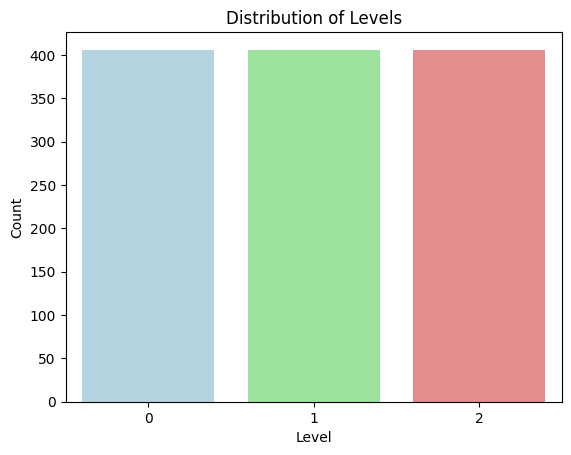

In [ ]:
level_order = [0, 1, 2]
colors = ['lightblue', 'lightgreen', 'lightcoral']
sns.countplot(x='RiskLevel', palette=colors, data=maternal_health_risk_df, order=level_order)
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()


## Data Scaling

- Some algorithm requier scaled data.

- We will define astandard scaled dataset using StandardScaler, to ensure that our data values are normally distriuted within the same range.

In [ ]:
continuous_features = maternal_health_risk_df.columns[:-1]
scaler = StandardScaler()
scaler.fit(maternal_health_risk_df[continuous_features])
scaled_features = scaler.transform(maternal_health_risk_df[continuous_features])
scaled_maternal_health_risk_df = pd.DataFrame(data=scaled_features, columns=continuous_features)
scaled_maternal_health_risk_df['target_variable'] = maternal_health_risk_df.iloc[:, -1]

scaled_maternal_health_risk_df

,Age,SystolicBP,DiastolicBP,BS,HeartRate,HighFever,target_variable
0,-0.400696,0.841212,0.189895,1.731986,1.422739,-0.519685,2
1,0.348648,1.377004,0.901780,1.154936,-0.565953,-0.519685,2
2,-0.100959,-1.301958,-0.521991,-0.287689,0.676980,1.924241,2
3,-0.026024,1.377004,0.545838,-0.576214,-0.565953,-0.519685,2
4,0.348648,0.305419,-1.233877,-0.835886,0.179807,-0.519685,0
...,...,...,...,...,...,...,...
1213,-1.000172,-1.301958,-0.949123,-0.356486,-0.938832,1.924241,2
1214,1.772404,1.377004,1.613666,1.731986,-1.063126,-0.519685,2
1215,0.123845,1.377004,1.613666,-0.438615,0.428393,-0.519685,2
1216,1.847338,1.377004,1.257723,2.886086,0.304100,-0.519685,2


## Data Splitting

- We split both datasets (the original one and the scaled one into 80% for training and 20% for testing)

In [ ]:
test_size = 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    maternal_health_risk_df.iloc[:, :-1],
    maternal_health_risk_df.iloc[:, -1],
    test_size=test_size,
    random_state=42
)
print("Original Data Split:\n")
print(f"X_train_original shape: {X_train.shape}")
print(f"X_test_original shape: {X_test.shape}")
print(f"y_train_original shape: {y_train.shape}")
print(f"y_test_original shape: {y_test.shape}")

Original Data Split:

X_train_original shape: (974, 6)
X_test_original shape: (244, 6)
y_train_original shape: (974,)
y_test_original shape: (244,)


In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    scaled_maternal_health_risk_df.iloc[:, :-1],
    scaled_maternal_health_risk_df.iloc[:, -1],
    test_size=test_size,
    random_state=42
)
print("\nScaled Data Split:\n")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")


Scaled Data Split:

X_train_scaled shape: (974, 6)
X_test_scaled shape: (244, 6)
y_train_scaled shape: (974,)
y_test_scaled shape: (244,)


# 4. Decision Tree Learning and Random Forests

## a. Decision Tree

- As first step, we use grid search to find a good combination of hyperparameters that gives a high accuracy score.

In [ ]:
DT_model = DecisionTreeClassifier()

In [ ]:
DT_param_grid = {
    'max_depth': range(5, 18),
    'min_samples_split': [2],
    'min_samples_leaf': range(1, 3),
    'max_features': [2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy']
}

In [ ]:
DT_grid_search = GridSearchCV(DT_model, DT_param_grid, cv=15, scoring='accuracy')

In [ ]:
DT_grid_search.fit(X_train, y_train)

DT_original_best_model = DT_grid_search.best_estimator_
DT_original_best_params = DT_grid_search.best_params_
DT_original_best_score = DT_grid_search.best_score_

print("Best Parameters:", DT_original_best_params)
print("Best Score:", DT_original_best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 17, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8357051282051284


Grid search give changing results each time, and dispite the good accuracy scores of these results (always >80%), they are mostly deep trees

We will fix the best hyperparameters that the grid search gives each time, like min_samples_leaf=1 and min_samples_split': 2, and we try to fine tune the other parameters using other techniques like graphs.

After multiple runs we observe that grid search give mostly max_features 5 or 4, we try both of them with different depths, to select the best max_features and depth value, by tracing the test and train accuracies vs max_depth.

- We look for the combination that gives high accuracies with no overfitting and the smallest max_depth possible.

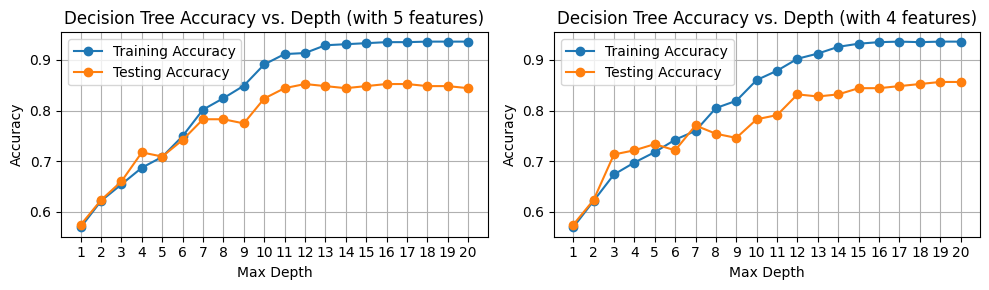

In [ ]:
depths = range(1, 21)

train_acc_5 = []
test_acc_5 = []

train_acc_4 = []
test_acc_4 = []

for depth in depths:
    clf_5 = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='gini', max_features= 5, min_samples_leaf= 1, min_samples_split= 2)
    clf_5.fit(X_train, y_train)

    clf_4 = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='gini', max_features= 4, min_samples_leaf= 1, min_samples_split= 2)
    clf_4.fit(X_train, y_train)

    y_train_pred_5 = clf_5.predict(X_train)
    y_test_pred_5 = clf_5.predict(X_test)

    y_train_pred_4 = clf_4.predict(X_train)
    y_test_pred_4 = clf_4.predict(X_test)

    train_accuracy_5 = accuracy_score(y_train, y_train_pred_5)
    test_accuracy_5 = accuracy_score(y_test, y_test_pred_5)

    train_accuracy_4 = accuracy_score(y_train, y_train_pred_4)
    test_accuracy_4 = accuracy_score(y_test, y_test_pred_4)

    train_acc_5.append(train_accuracy_5)
    test_acc_5.append(test_accuracy_5)

    train_acc_4.append(train_accuracy_4)
    test_acc_4.append(test_accuracy_4)


fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(depths, train_acc_5, label='Training Accuracy', marker='o')
axs[0].plot(depths, test_acc_5, label='Testing Accuracy', marker='o')
axs[0].set_title('Decision Tree Accuracy vs. Depth (with 5 features)')
axs[0].set_xlabel('Max Depth')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(depths)
axs[0].legend()
axs[0].grid(True)

axs[1].plot(depths, train_acc_4, label='Training Accuracy', marker='o')
axs[1].plot(depths, test_acc_4, label='Testing Accuracy', marker='o')
axs[1].set_title('Decision Tree Accuracy vs. Depth (with 4 features)')
axs[1].set_xlabel('Max Depth')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(depths)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

- We clearly see that for 5 features we depth 12 we have the best result.

In [ ]:
clf_5 = DecisionTreeClassifier(max_depth=12, random_state=42, criterion='gini', max_features= 5, min_samples_leaf= 1, min_samples_split= 2)
clf_5.fit(X_train, y_train)
y_pred_train_DT_5 = clf_5.predict(X_train)
y_pred_test_DT_5 = clf_5.predict(X_test)
train_score_DT_5 = accuracy_score(y_train, y_pred_train_DT_5)
test_score_DT_5 = accuracy_score(y_test, y_pred_test_DT_5)

print("\nTraining Score for 5/11 data:", train_score_DT_5)
print("Testing Score for 5/11 data:", test_score_DT_5)


Training Score for 5/11 data: 0.9137577002053389
Testing Score for 5/11 data: 0.8524590163934426


- After selecting the best simple decision tree, we can use it with Adaboost to ''boost'' its performance.

We trace the test and train accuracies vs n_estimators of adaboost, to find the best value for this parameter.

We tried to do this with different learning rate, and learning rate that gave the best graph is 0.001

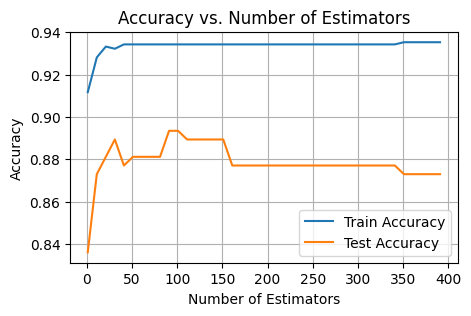

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
adaboost_clf = AdaBoostClassifier(base_estimator=clf_5,
                                   n_estimators=1000,
                                   learning_rate=0.001,
                                   random_state=42)
train_accuracy = []
test_accuracy = []
estimators_range = range(1, 400, 10)
for n_estimators in estimators_range:
    adaboost_clf.n_estimators = n_estimators
    adaboost_clf.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, adaboost_clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, adaboost_clf.predict(X_test)))

plt.figure(figsize=(5, 3))
plt.plot(estimators_range, train_accuracy, label='Train Accuracy')
plt.plot(estimators_range, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

- The best n-estimator is 90, for learning rate 0.001.

In [ ]:
best_DT_adaboost = AdaBoostClassifier(base_estimator=clf_5, n_estimators=90, learning_rate=0.001, random_state=42)
best_DT_adaboost.fit(X_train, y_train)
y_pred_train_adaboost_DT = best_DT_adaboost.predict(X_train)
y_pred_test_adaboost_DT = best_DT_adaboost.predict(X_test)

train_score_adaboost_DT = accuracy_score(y_train, y_pred_train_adaboost_DT)
test_score_adaboost_DT = accuracy_score(y_test, y_pred_test_adaboost_DT)

print("\nTraining Score for adaboost data:", train_score_adaboost_DT)
print("Testing Score for adaboost data:", test_score_adaboost_DT)


Training Score for adaboost data: 0.9342915811088296
Testing Score for adaboost data: 0.8934426229508197


- We can see that adaboost rased the accuracies, and reduced the ratio between them (no overfitting).


- Evaluation of Best DT

In [ ]:
best_DT= clf_5
best_DT.fit(X_train, y_train)
y_pred_train_DT = best_DT.predict(X_train)
y_pred_test_DT = best_DT.predict(X_test)

train_score_DT = accuracy_score(y_train, y_pred_train_DT)
test_score_DT = accuracy_score(y_test, y_pred_test_DT)

print("\nTraining Score for DT data:", train_score_DT)
print("Testing Score for DT data:", test_score_DT)


Training Score for DT data: 0.9137577002053389
Testing Score for DT data: 0.8524590163934426


For test


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        87
           1       0.74      0.85      0.79        81
           2       0.97      0.93      0.95        76

    accuracy                           0.85       244
   macro avg       0.86      0.86      0.86       244
weighted avg       0.86      0.85      0.85       244



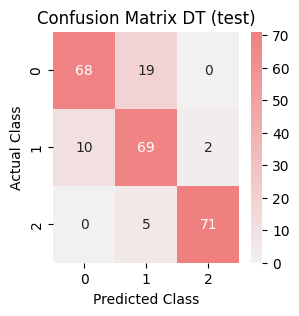

In [370]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_DT))

confusion_matrix_result_DT = confusion_matrix(y_test, y_pred_test_DT)

pastel_palette = sns.light_palette("lightcoral", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_DT, annot=True, fmt="d", cmap=pastel_palette)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix DT (test)")
plt.show()
classification_report_DT = classification_report(y_test, y_pred_test_DT)

For train


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       319
           1       0.88      0.89      0.88       325
           2       0.94      0.96      0.95       330

    accuracy                           0.91       974
   macro avg       0.91      0.91      0.91       974
weighted avg       0.91      0.91      0.91       974



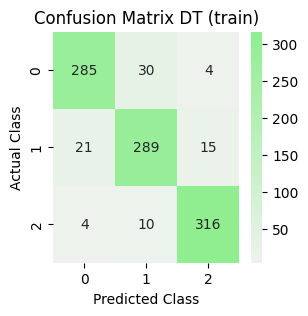

In [336]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train_DT))

confusion_matrix_result_DT_train = confusion_matrix(y_train, y_pred_train_DT)

pastel_palette = sns.light_palette("lightgreen", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_DT_train, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix DT (train)")
plt.show()

The Decision Tree model demonstrates strong performance on both seen and unseen data, with high precision, recall, and F1-score values across all classes. Some misclassifications are observed, most are: Low risk predicted as mid risk, which is not bad for classifying maternal health risk levels that prioritize high risk classification.

- Evaluation of best DT with AdaBoost

test


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        87
           1       0.81      0.90      0.85        81
           2       0.97      0.93      0.95        76

    accuracy                           0.89       244
   macro avg       0.90      0.90      0.90       244
weighted avg       0.90      0.89      0.89       244



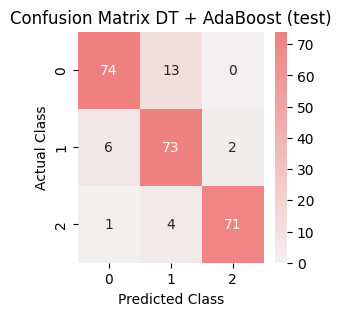

In [341]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_adaboost_DT))

confusion_matrix_result_DT = confusion_matrix(y_test, y_pred_test_adaboost_DT)

pastel_palette = sns.light_palette("lightcoral", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_DT, annot=True, fmt="d", cmap=pastel_palette)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix DT + AdaBoost (test)")
plt.show()

train


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       319
           1       0.91      0.92      0.92       325
           2       0.94      0.97      0.95       330

    accuracy                           0.93       974
   macro avg       0.93      0.93      0.93       974
weighted avg       0.93      0.93      0.93       974



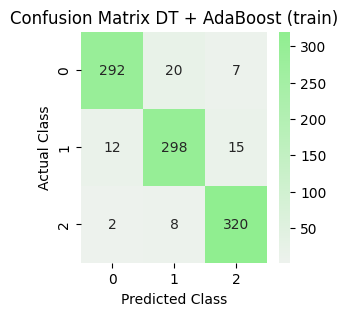

In [340]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train_adaboost_DT))

confusion_matrix_result_DT_train = confusion_matrix(y_train, y_pred_train_adaboost_DT)

pastel_palette = sns.light_palette("lightgreen", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_DT_train, annot=True, fmt="d", cmap=pastel_palette)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix DT + AdaBoost (train)")
plt.show()


Decision tree with adaboost follows the same trend (rates) as the simple decision tree performance, but with higher measures values, and less misclassifications.

## b. Random Forests

- As we did in DT, we start by using grid search to find a good combination of hyperparameters that gives a high accuracy score.

In [ ]:
RF_model = RandomForestClassifier()

In [ ]:
RF_param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [14, 15, 16],
    'n_estimators': [50, 70, 80, 90],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': [3,4,5]
}

In [ ]:
RF_grid_search = GridSearchCV(estimator=RF_model, param_grid=RF_param_grid, cv=5, scoring='accuracy')

In [ ]:
RF_grid_search.fit(X_train, y_train)

RF_original_best_model = RF_grid_search.best_estimator_
RF_original_best_params = RF_grid_search.best_params_
RF_original_best_score = RF_grid_search.best_score_

print("Best Parameters:", RF_original_best_params)
print("Best Score:", RF_original_best_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8213534232090932


And now we fix the hyperparameters values that the grid search gave almost for each run, and we try to fine tune the changing ones: n_estimator and max_depth, aspecially that we need those two to be as small as possible.

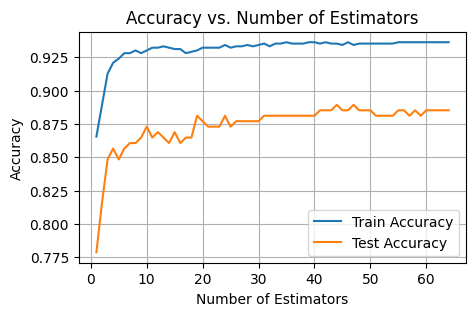

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, criterion='gini', max_depth=15, max_features=5)
train_accuracy = []
test_accuracy = []
estimators_range = range(1, 65, 1)
for n_estimators in estimators_range:
    clf.n_estimators = n_estimators
    clf.fit(X_train, y_train)

    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(5, 3))
plt.plot(estimators_range, train_accuracy, label='Train Accuracy')
plt.plot(estimators_range, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

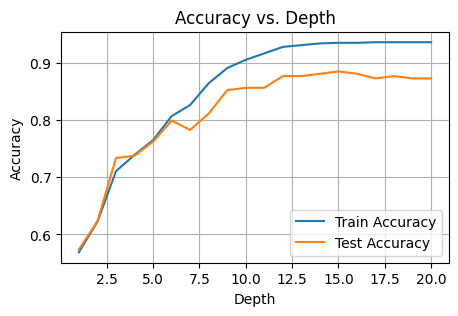

In [ ]:
clf = RandomForestClassifier(n_estimators=43, random_state=42, criterion='gini', max_depth=1, max_features=5)
train_accuracy = []
test_accuracy = []
depths = range(1, 21)
for depth in depths:
    clf.max_depth = depth
    clf.fit(X_train, y_train)

    clf.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(5, 3))
plt.plot(depths, train_accuracy, label='Train Accuracy')
plt.plot(depths, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_RF = RandomForestClassifier(n_estimators=43, random_state=42, criterion='gini', max_depth=15, max_features=5)
best_RF.fit(X_train, y_train)
y_pred_train_RF = best_RF.predict(X_train)
y_pred_test_RF = best_RF.predict(X_test)
train_score_RF = accuracy_score(y_train, y_pred_train_RF)
test_score_RF = accuracy_score(y_test, y_pred_test_RF)

print("\nTraining Score:", train_score_RF)
print("Testing Score:", test_score_RF)


Training Score: 0.9353182751540041
Testing Score: 0.8852459016393442


Now we have a good Random Forest model with high accurecies, and small ratio between them.

We can look for eaven better results by using this best RF model as base estimator for Adaboost.

Let's try different n_estimator values for learning rat 0.1 (chosen after several trials) and we trace the test and train accuracy vs n_estimators.

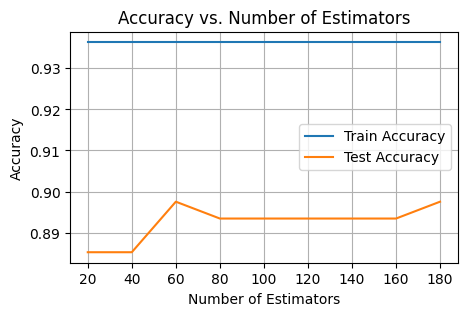

In [ ]:
adaboost_clf = AdaBoostClassifier(base_estimator=best_RF, n_estimators=1000, learning_rate=0.1, random_state=42)
train_accuracy = []
test_accuracy = []
estimators_range = range(20, 200, 20)
for n_estimators in estimators_range:
    adaboost_clf.n_estimators = n_estimators
    adaboost_clf.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, adaboost_clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, adaboost_clf.predict(X_test)))

plt.figure(figsize=(5, 3))
plt.plot(estimators_range, train_accuracy, label='Train Accuracy')
plt.plot(estimators_range, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

We see that it improved the model for 60

In [ ]:
best_adaboost_RF = AdaBoostClassifier(base_estimator=best_RF, n_estimators=60, learning_rate=0.1, random_state=42)
best_adaboost_RF.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=15,
                                                         max_features=5,
                                                         n_estimators=43,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=60, random_state=42)

In [288]:
y_predict_train_adaboost_RF = best_adaboost_RF.predict(X_train)
y_predict_test_adaboost_RF = best_adaboost_RF.predict(X_test)

train_acc_adaboost_RF = accuracy_score(y_train, y_predict_train_adaboost_RF)
test_acc_adaboost_RF = accuracy_score(y_test, y_predict_test_adaboost_RF)

print("\nTraining Score:", train_acc_adaboost_RF)
print("Testing Score:", test_acc_adaboost_RF)

y_pred_RF = y_predict_test_adaboost_RF


Training Score: 0.9363449691991786
Testing Score: 0.8975409836065574


We see that there is a small improvement in the test accuracy.

- Evaluation of the best RF model

For test


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        87
           1       0.79      0.90      0.84        81
           2       0.97      0.93      0.95        76

    accuracy                           0.89       244
   macro avg       0.89      0.89      0.89       244
weighted avg       0.89      0.89      0.89       244



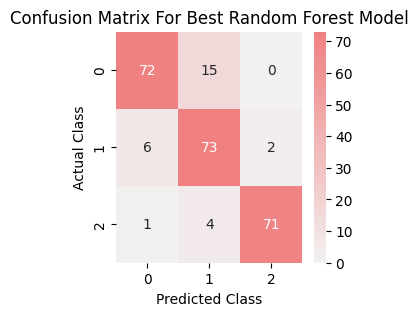

In [337]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_RF))

confusion_matrix_result_RF = confusion_matrix(y_test, y_pred_test_RF)

pastel_palette = sns.light_palette("lightcoral", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_RF, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix For Best Random Forest Model")
plt.show()

for train


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       319
           1       0.92      0.91      0.92       325
           2       0.92      0.98      0.95       330

    accuracy                           0.94       974
   macro avg       0.94      0.93      0.93       974
weighted avg       0.94      0.94      0.94       974



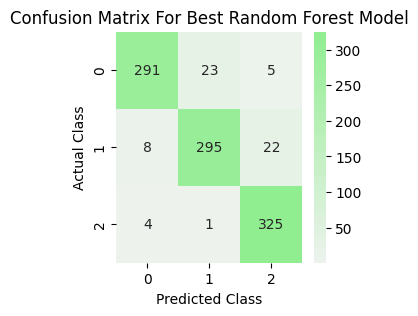

In [ ]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train_RF))

confusion_matrix_result_RF = confusion_matrix(y_train, y_pred_train_RF)

pastel_palette = sns.light_palette("lightgreen", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_RF, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix For Best Random Forest Model")
plt.show()

The RF model achieves strong performance on both training and testing data, with high precision, recall, and F1-score values across all classes, especially for high risk, the smallest value is the precision of the middle class, but it is not too low (around 0.79)


- Evaluation of the best RF with adaboost model

for test


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        87
           1       0.82      0.90      0.86        81
           2       1.00      0.97      0.99        76

    accuracy                           0.90       244
   macro avg       0.90      0.90      0.90       244
weighted avg       0.90      0.90      0.90       244



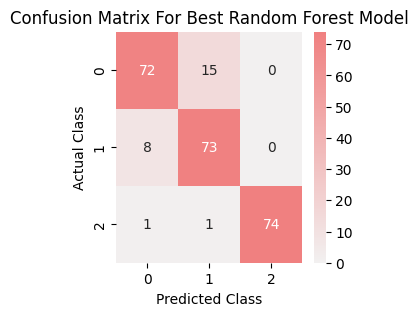

In [371]:
print("\nClassification Report:")
print(classification_report(y_test, y_predict_test_adaboost_RF))

confusion_matrix_result_adaboost_RF = confusion_matrix(y_test, y_predict_test_adaboost_RF)

pastel_palette = sns.light_palette("lightcoral", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_adaboost_RF, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix For Best Random Forest Model")
plt.show()
confusion_matrix_result_adaboost_RF
classification_report_RF = classification_report(y_test, y_predict_test_adaboost_RF)

for train


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       319
           1       0.93      0.91      0.92       325
           2       0.93      0.98      0.95       330

    accuracy                           0.94       974
   macro avg       0.94      0.94      0.94       974
weighted avg       0.94      0.94      0.94       974



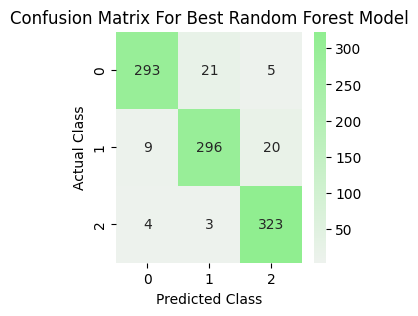

In [339]:
print("\nClassification Report:")
print(classification_report(y_train, y_predict_train_adaboost_RF))

confusion_matrix_result_adaboost_RF_train = confusion_matrix(y_train, y_predict_train_adaboost_RF)

pastel_palette = sns.light_palette("lightgreen", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_adaboost_RF_train, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix For Best Random Forest Model")
plt.show()

The RF model with AdaBoost achieves stronger performance on both training and testing data, with high precision, recall, and F1-score values across all classes, especially for high risk, and it improved the measures results for the secind class.


# 5. KNN

Here also, we start with grid search to fix some hyperparameters. But not on both scaled and unscaled datasets, since those two give slightly different results (comparing to DT and RF)

After selecting the forme of dataset with which the model works better, we try to do more fine tuning for some hyperparameters.


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': range(1,10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'brute'],
    'leaf_size': [5, 10],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

In [ ]:
KNN_grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

- with unscaled dataset

In [ ]:
KNN_grid_search.fit(X_train, y_train)

KNN_original_best_model = KNN_grid_search.best_estimator_
KNN_original_best_params = KNN_grid_search.best_params_
KNN_original_best_score = KNN_grid_search.best_score_

print("Best Parameters:", KNN_original_best_params)
print("Best Score:", KNN_original_best_score)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.8408899642331159


The hyperparameters adjasment made by the grid search gave a good accuracy score with the unscaled dataset.

- With scaled dataset

In [ ]:
KNN_grid_search.fit(X_train_scaled, y_train_scaled)

KNN_scaled_best_model = KNN_grid_search.best_estimator_
KNN_scaled_best_params = KNN_grid_search.best_params_
KNN_scaled_best_score = KNN_grid_search.best_score_

print("Best Parameters:", KNN_scaled_best_params)
print("Best Score:", KNN_scaled_best_score)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 5, 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.8296654744371976


We see that the grid search gave better accuracy score with the unscaled dataset. So we will continue working with this forme of dataset.

For the next step, we fix the repetitive values, and we do some further fine tuning on the n_neighbors that is changing. By tracing the test and train accuracies vs n_neighbors.

[0.8360655737704918, 0.8278688524590164, 0.8729508196721312, 0.8237704918032787, 0.8483606557377049, 0.8278688524590164, 0.8524590163934426, 0.8442622950819673, 0.8442622950819673, 0.8360655737704918, 0.8688524590163934, 0.8647540983606558, 0.8524590163934426, 0.8565573770491803, 0.8483606557377049, 0.8442622950819673, 0.8483606557377049, 0.8565573770491803, 0.8565573770491803, 0.8565573770491803, 0.860655737704918, 0.8524590163934426, 0.8524590163934426, 0.8524590163934426, 0.8565573770491803, 0.8565573770491803, 0.8565573770491803, 0.8565573770491803, 0.8565573770491803]


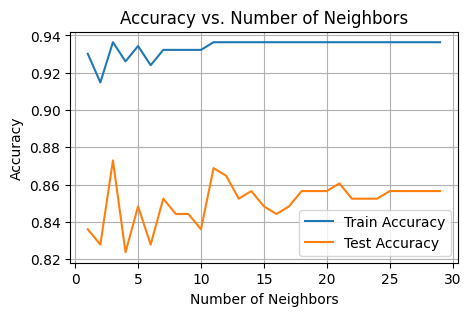

In [ ]:
train_accuracy = []
test_accuracy = []
n_neibors = range(1, 30, 1)
for n in n_neibors:
    clf = KNeighborsClassifier(algorithm= 'auto', leaf_size= 8, metric= 'euclidean', weights= 'distance', n_neighbors=n)
    clf.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
print(test_accuracy)
plt.figure(figsize=(5, 3))
plt.plot(n_neibors, train_accuracy, label='Train Accuracy')
plt.plot(n_neibors, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

- The best n_neighbors is 2, for leaf_size of 8, metric euclidean, weights distance

In [ ]:
best_KNN = KNeighborsClassifier(algorithm= 'auto', leaf_size= 8, metric= 'euclidean', weights= 'distance', n_neighbors=11)
best_KNN.fit(X_train, y_train)
y_pred_train_KNN = best_KNN.predict(X_train)
y_pred_test_KNN = best_KNN.predict(X_test)
train_score_KNN = accuracy_score(y_train, y_pred_train_KNN)
test_score_KNN = accuracy_score(y_test, y_pred_test_KNN)

print("\nTraining Score:", train_score_KNN)
print("Testing Score:", test_score_KNN)


Training Score: 0.9363449691991786
Testing Score: 0.8688524590163934


The reasult is quite good, we have high accuracies for both train andtest, maybe the ratio between them is slightly higher comparing to the previous models we've got.

To see if we can have better results, we try KNN with Bagging.

We try first with search grid

In [ ]:
base_knn = best_KNN
param_grid = {
     'n_estimators': [10, 20, 30],
     'max_samples': [0.6, 0.7, 0.8],
     'max_features': [3, 4, 5],
     'bootstrap': [False],
     'bootstrap_features': [True],
}

bagging_knn = BaggingClassifier(estimator=base_knn)

bagging_grid_search = GridSearchCV(bagging_knn, param_grid, cv=5)
bagging_grid_search.fit(X_train, y_train)

bagging_best_model = bagging_grid_search.best_estimator_
bagging_best_params = bagging_grid_search.best_params_
bagging_best_score = bagging_grid_search.best_score_

print("Best Parameters:", bagging_best_params)
print("Best Score:", bagging_best_score)

Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 5, 'max_samples': 0.8, 'n_estimators': 30}
Best Score: 0.811075865715041


We see that the accuracy score is lower, we can try some more fine tuning, by trying different n_estimators of bagging.

[0.7622950819672131, 0.7950819672131147, 0.8114754098360656, 0.8360655737704918, 0.860655737704918, 0.8565573770491803, 0.8401639344262295, 0.8524590163934426, 0.8237704918032787, 0.8483606557377049, 0.8237704918032787, 0.8483606557377049, 0.860655737704918, 0.8770491803278688, 0.8688524590163934, 0.8565573770491803, 0.860655737704918, 0.8688524590163934, 0.8319672131147541, 0.8565573770491803, 0.860655737704918, 0.8524590163934426, 0.8688524590163934, 0.8729508196721312, 0.860655737704918, 0.8565573770491803, 0.8401639344262295, 0.8524590163934426, 0.8729508196721312, 0.8565573770491803, 0.8729508196721312, 0.8483606557377049, 0.8442622950819673, 0.8524590163934426, 0.8729508196721312, 0.8688524590163934, 0.8852459016393442, 0.8770491803278688, 0.8483606557377049, 0.860655737704918, 0.860655737704918, 0.889344262295082, 0.860655737704918, 0.8770491803278688, 0.8647540983606558, 0.8565573770491803, 0.8565573770491803, 0.8688524590163934, 0.860655737704918]


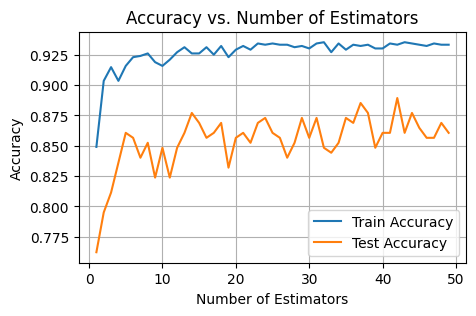

In [ ]:
train_accuracy = []
test_accuracy = []
n_estimators = range(1, 50, 1)
for n in n_estimators:
    clf = BaggingClassifier(estimator=base_knn, n_estimators=n, max_features=5, max_samples=0.8)
    clf.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
print(test_accuracy)
plt.figure(figsize=(5, 3))
plt.plot(n_estimators, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

We see that the bagging give unconsistant results, it can give much higher accuracy comparing to the simple KNN, but it also can give much worst and for the same n_estimator for each run.

To illustrate this let's take the n_estimator that give us the better test accuracy (around 0.88) and reuse it.

In [ ]:
best_KNN_bag = BaggingClassifier(estimator=base_knn, n_estimators=13, max_features=5, max_samples=0.8)
best_KNN_bag.fit(X_train, y_train)
y_pred_train_KNN_bag = best_KNN_bag.predict(X_train)
y_pred_test_KNN_bag = best_KNN_bag.predict(X_test)
train_score_KNN_bag = accuracy_score(y_train, y_pred_train_KNN_bag)
test_score_KNN_bag = accuracy_score(y_test, y_pred_test_KNN_bag)

print("\nTraining Score:", train_score_KNN_bag)
print("Testing Score:", test_score_KNN_bag)

y_pred_KNN = y_pred_test_KNN_bag


Training Score: 0.9271047227926078
Testing Score: 0.8360655737704918


The result is less than the one in the graph, also less than the one with the simple KNN model. So we choose the simple one we trained above.

For test


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        87
           1       0.78      0.90      0.84        81
           2       0.99      0.92      0.95        76

    accuracy                           0.87       244
   macro avg       0.88      0.87      0.87       244
weighted avg       0.88      0.87      0.87       244



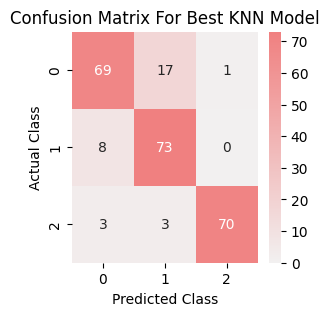

In [372]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_KNN))

confusion_matrix_result_KNN = confusion_matrix(y_test, y_pred_test_KNN)

pastel_palette = sns.light_palette("lightcoral", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_KNN, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix For Best KNN Model")
plt.show()
classification_report_KNN = classification_report(y_test, y_pred_test_KNN)

For train


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       319
           1       0.91      0.93      0.92       325
           2       0.94      0.96      0.95       330

    accuracy                           0.94       974
   macro avg       0.94      0.94      0.94       974
weighted avg       0.94      0.94      0.94       974



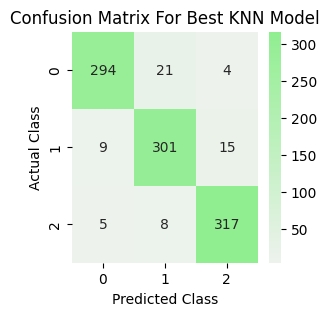

In [342]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train_KNN))

confusion_matrix_result_KNN_train = confusion_matrix(y_train, y_pred_train_KNN)

pastel_palette = sns.light_palette("lightgreen", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_result_KNN_train, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix For Best KNN Model")
plt.show()

We observe a small overfit.

# 6. Naive Bayes

After several trials, we conclude that Naive Bayes works horrebly with the oversampled dataset and all the features transformations we did in data preparation section. So we decided to use the origial dataset for this part.

We also observed that the NB models works sometimes better with a duplicate free dataset. So in this section we will try all the possible formes of the original dataset (unscalde with duplicates, unscaled with no duplicates, scaled with duplicates, scaled with no duplicates) to selecte the one with which the model works the best.

## Use the original data (without augmentation or any change i the features)

In [ ]:
# fetch
maternal_health_risk_org = fetch_ucirepo(id=863)
X_org = maternal_health_risk_org.data.features
y_org = maternal_health_risk_org.data.targets

maternal_health_risk_df_org = pd.concat([X_org, y_org], axis=1)

In [ ]:
# scale
continuous_features_org = maternal_health_risk_df_org.columns[:-1]
scaler.fit(maternal_health_risk_df_org[continuous_features_org])
scaled_features = scaler.transform(maternal_health_risk_df_org[continuous_features_org])
scaled_maternal_health_risk_df_org = pd.DataFrame(data=scaled_features, columns=continuous_features_org)
scaled_maternal_health_risk_df_org['target_variable'] = maternal_health_risk_df_org.iloc[:, -1]

In [ ]:
# split
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(
    maternal_health_risk_df_org.iloc[:, :-1],
    maternal_health_risk_df_org.iloc[:, -1],
    test_size=test_size,
    random_state=42
)
print("Original Data Split:\n")
print(f"X_train_original shape: {X_train_org.shape}")
print(f"X_test_original shape: {X_test_org.shape}")
print(f"y_train_original shape: {y_train_org.shape}")
print(f"y_test_original shape: {y_test_org.shape}")

Original Data Split:

X_train_original shape: (811, 6)
X_test_original shape: (203, 6)
y_train_original shape: (811,)
y_test_original shape: (203,)


In [ ]:
# split scaled
X_train_scaled_org, X_test_scaled_org, y_train_scaled_org, y_test_scaled_org = train_test_split(
    scaled_maternal_health_risk_df_org.iloc[:, :-1],
    scaled_maternal_health_risk_df_org.iloc[:, -1],
    test_size=test_size,
    random_state=42
)
print("\nScaled Data Split:\n")
print(f"X_train_scaled shape: {X_train_scaled_org.shape}")
print(f"X_test_scaled shape: {X_test_scaled_org.shape}")
print(f"y_train_scaled shape: {y_train_scaled_org.shape}")
print(f"y_test_scaled shape: {y_test_scaled_org.shape}")


Scaled Data Split:

X_train_scaled shape: (811, 6)
X_test_scaled shape: (203, 6)
y_train_scaled shape: (811,)
y_test_scaled shape: (203,)


## Handling duplicates for both scaled and non scaled data

In [ ]:
# Remove duplicate rows from the DataFrame
maternal_health_risk_nodup_df_org = maternal_health_risk_df_org.copy()
maternal_health_risk_nodup_df_org = maternal_health_risk_nodup_df_org.drop_duplicates()

In [ ]:
# Remove duplicate rows from the scaled DataFrame
scaled_maternal_health_risk_nodup_df_org = scaled_maternal_health_risk_df_org.copy()
scaled_maternal_health_risk_nodup_df_org = scaled_maternal_health_risk_nodup_df_org.drop_duplicates()

In [ ]:
# Split the data without duplicates (features and target variable)
X_train_nodup_org, X_test_nodup_org, y_train_nodup_org, y_test_nodup_org = train_test_split(
    maternal_health_risk_nodup_df_org.iloc[:, :-1],
    maternal_health_risk_nodup_df_org.iloc[:, -1],
    test_size=test_size,
    random_state=42
)
print("\nScaled Data Split:\n")
print(f"X_train_scaled shape: {X_train_nodup_org.shape}")
print(f"X_test_scaled shape: {X_test_nodup_org.shape}")
print(f"y_train_scaled shape: {y_train_nodup_org.shape}")
print(f"y_test_scaled shape: {y_test_nodup_org.shape}")


Scaled Data Split:

X_train_scaled shape: (361, 6)
X_test_scaled shape: (91, 6)
y_train_scaled shape: (361,)
y_test_scaled shape: (91,)


In [ ]:
# Split the scaled data without duplicates (features and target variable)
X_train_scaled_nodup_org, X_test_scaled_nodup_org, y_train_scaled_nodup_org, y_test_scaled_nodup_org = train_test_split(
    scaled_maternal_health_risk_nodup_df_org.iloc[:, :-1],
    scaled_maternal_health_risk_nodup_df_org.iloc[:, -1],
    test_size=test_size,
    random_state=42
)

print("\nScaled Data Split:\n")
print(f"X_train_scaled shape: {X_train_scaled_nodup_org.shape}")
print(f"X_test_scaled shape: {X_test_scaled_nodup_org.shape}")
print(f"y_train_scaled shape: {y_train_scaled_nodup_org.shape}")
print(f"y_test_scaled shape: {y_test_scaled_nodup_org.shape}")


Scaled Data Split:

X_train_scaled shape: (361, 6)
X_test_scaled shape: (91, 6)
y_train_scaled shape: (361,)
y_test_scaled shape: (91,)


## Training models

We start by running a grid search on the four forms of dataset, to select the best one, and then continue our process with more fine tuning.

In [ ]:
NB = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
naive_grid_search = GridSearchCV(NB, params_NB, cv=10, scoring='accuracy')

In [ ]:
# Fit the grid search to the training with duplicated data
naive_grid_search.fit(X_train_org, y_train_org)
y_pred_NB = naive_grid_search.predict(X_test_org)
accuracy = accuracy_score(y_test_org, y_pred_NB)
print("Best Model Accuracy for data with duplicates:", accuracy)



# Fit the grid search to the training no duplicated data
naive_grid_search.fit(X_train_nodup_org, y_train_nodup_org)
y_pred_NB_org_nodup = naive_grid_search.predict(X_test_nodup_org)
accuracy = accuracy_score(y_test_nodup_org, y_pred_NB_org_nodup)
print("\nBest Model Accuracy for data without duplicates:", accuracy)



# Fit the grid search to the training scaled data
naive_grid_search.fit(X_train_scaled_org, y_train_scaled_org)
y_pred_NB_scl = naive_grid_search.predict(X_test_scaled_org)
accuracy = accuracy_score(y_test_scaled_org, y_pred_NB_scl)
print("\nBest Model Accuracy for scaled data with duplicates:", accuracy)



# Fit the grid search to the training scaled and no duplicates data
naive_grid_search.fit(X_train_scaled_nodup_org, y_train_scaled_nodup_org)
y_pred_NB_scl_nodup = naive_grid_search.predict(X_test_scaled_nodup_org)
accuracy = accuracy_score(y_test_scaled_nodup_org, y_pred_NB_scl_nodup)
print("\nBest Model Accuracy for scaled data without duplicates:", accuracy)

Best Model Accuracy for data with duplicates: 0.6206896551724138

Best Model Accuracy for data without duplicates: 0.6373626373626373

Best Model Accuracy for scaled data with duplicates: 0.5763546798029556

Best Model Accuracy for scaled data without duplicates: 0.6373626373626373


- Observation
  
  The scaled data with no duplicates gives best performance either scaled or not

- Here is a technique to try fine tuning our model, using fit_transform to transform our data.

We will use a features transformation on the 4 formes of dataset, and run again the grid search on them.

In [ ]:
train_transformed = PowerTransformer().fit_transform(X_train_org)
test_transformed = PowerTransformer().fit_transform(X_test_org)

train_scaled_transformed = PowerTransformer().fit_transform(X_train_scaled_org)
test_scaled_transformed = PowerTransformer().fit_transform(X_test_scaled_org)

train_nodup_transformed = PowerTransformer().fit_transform(X_train_nodup_org)
test_nodup_transformed = PowerTransformer().fit_transform(X_test_nodup_org)

train_scaled_nodup_transformed = PowerTransformer().fit_transform(X_train_scaled_nodup_org)
test_scaled_nodup_transformed = PowerTransformer().fit_transform(X_test_scaled_nodup_org)

In [ ]:
# Fit the grid search to the training data
naive_grid_search.fit(train_transformed, y_train_org)
y_pred_NB_org = naive_grid_search.predict(test_transformed)
accuracy = accuracy_score(y_test_org, y_pred_NB_org)
print("Best Model Accuracy for data with duplicates:", accuracy)



# Fit the grid search to the training data
naive_grid_search.fit(train_nodup_transformed, y_train_nodup_org)
y_pred_NB_org_nodup = naive_grid_search.predict(test_nodup_transformed)
accuracy = accuracy_score(y_test_nodup_org, y_pred_NB_org_nodup)
print("\nBest Model Accuracy for data without duplicates:", accuracy)



# Fit the grid search to the training data
naive_grid_search.fit(train_scaled_transformed, y_train_scaled_org)
y_pred_NB_scl = naive_grid_search.predict(test_scaled_transformed)
accuracy = accuracy_score(y_test_scaled_org, y_pred_NB_scl)
print("\nBest Model Accuracy for scaled data with duplicates:", accuracy)



# Fit the grid search to the training data
naive_grid_search.fit(train_scaled_nodup_transformed, y_train_scaled_nodup_org)
y_pred_NB_scl_nodup = naive_grid_search.predict(test_scaled_nodup_transformed)
accuracy = accuracy_score(y_test_scaled_nodup_org, y_pred_NB_scl_nodup)
print("\nBest Model Accuracy for scaled data without duplicates:", accuracy)

Best Model Accuracy for data with duplicates: 0.6059113300492611

Best Model Accuracy for data without duplicates: 0.6483516483516484

Best Model Accuracy for scaled data with duplicates: 0.645320197044335

Best Model Accuracy for scaled data without duplicates: 0.6483516483516484


- Observation:
  
  Here with the transformed data set we can see some improvment especially in the scaled transformed without duplicates (highest accuracy), but the scores still vety low (max 0.64)

Now, we try Binning, which is an interesting approach especially for Naive Bayes algorithm.

And we start by looking for the best n_bins that will ensure the highest train and test accuracies.

We try to train the NB model with different n_bins values, on the scaled dataset without duplicates (since it is always the dataset form that gives the best results for any approach)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:268: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:268: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


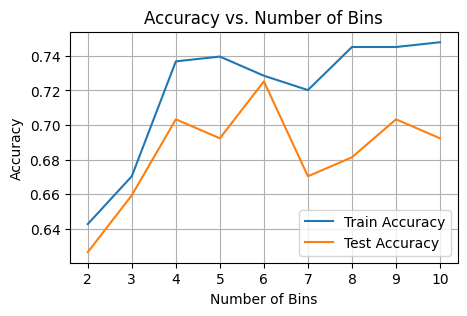

In [ ]:
features_to_bin = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]

train_accuracy = []
test_accuracy = []
accuracy = []
n_bins = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_bins:
    est = KBinsDiscretizer(n_bins=n, strategy='kmeans')
    est.fit(X_train_scaled_nodup_org[features_to_bin])

    X_train_binned = est.transform(X_train_scaled_nodup_org[features_to_bin]).toarray()
    X_test_binned = est.transform(X_test_scaled_nodup_org[features_to_bin]).toarray()

    naive_grid_search.fit(X_train_binned, y_train_scaled_nodup_org)

    y_test_pred_binned = naive_grid_search.predict(X_test_binned)
    y_train_pred_binned = naive_grid_search.predict(X_train_binned)
    test_acc = accuracy_score(y_test_scaled_nodup_org, y_test_pred_binned)
    train_acc = accuracy_score(y_train_scaled_nodup_org, y_train_pred_binned)

    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)



plt.figure(figsize=(5, 3))
plt.plot(n_bins, train_accuracy, label='Train Accuracy')
plt.plot(n_bins, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Number of Bins')
plt.xlabel('Number of Bins')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

We see that NB reaches the best test accuracy for n_bins=6, and the train accuracy is too close to it (no overfitting).



Here we use the chosen model

In [ ]:
est = KBinsDiscretizer(n_bins=6, strategy='kmeans')
est.fit(X_train_scaled_nodup_org[features_to_bin])

X_train_binned = est.transform(X_train_scaled_nodup_org[features_to_bin]).toarray()
X_test_binned = est.transform(X_test_scaled_nodup_org[features_to_bin]).toarray()

naive_grid_search.fit(X_train_binned, y_train_scaled_nodup_org)

Naive_bayes=naive_grid_search.best_estimator_
y_test_pred_binned = Naive_bayes.predict(X_test_binned)
y_train_pred_binned = Naive_bayes.predict(X_train_binned)

test_acc = accuracy_score(y_test_scaled_nodup_org, y_test_pred_binned)
train_acc = accuracy_score(y_train_scaled_nodup_org, y_train_pred_binned)

print("Model train Accuracy with Binned Data using Grid Search:", train_acc)
print("Model test Accuracy with Binned Data using Grid Search:", test_acc)

Model train Accuracy with Binned Data using Grid Search: 0.7285318559556787
Model test Accuracy with Binned Data using Grid Search: 0.7252747252747253


The results are not too high, but they are quite good and acceptable.

We will try cross-validation with stratefied k-fold, by looking for the k value that will improve our model.

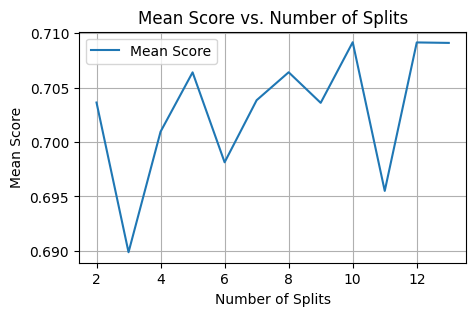

[0.703621853898097, 0.6898760330578512, 0.7009462759462759, 0.706392694063927, 0.6981329690346084, 0.7038353803059686, 0.706400966183575, 0.7035907859078592, 0.7091591591591592, 0.6955061983471075, 0.7091397849462365, 0.7090964590964591]


In [ ]:
scores = []
n_splits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for n in n_splits:
    cv = StratifiedKFold(n_splits=n)
    cv_scores = cross_val_score(Naive_bayes, X_train_binned, y_train_scaled_nodup_org, cv=cv, scoring='accuracy')
    scores.append(cv_scores.mean())

plt.figure(figsize=(5, 3))
plt.plot(n_splits, scores, label='Mean Score')
#plt.plot(n_bins, test_accuracy, label='Test Accuracy')
plt.title('Mean Score vs. Number of Splits')
plt.xlabel('Number of Splits')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)
plt.show()

print(scores)

we can see that the results are lower then the accuracy of our plain model.

Now we try some bagging to check for possible improvement

In [ ]:

bagging_clf = BaggingClassifier(base_estimator=Naive_bayes, random_state=42)

param_grid = {
    'n_estimators': [5, 10, 20, 40, 50],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [3, 4]
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(bagging_clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_binned, y_train_scaled_nodup_org)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

best_bagging_clf = grid_search.best_estimator_
y_pred_binned = best_bagging_clf.predict(X_test_binned)
accuracy = accuracy_score(y_test_scaled_nodup_org, y_pred_binned)
print("Test Data Accuracy with Best Bagging Classifier:", accuracy)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_features': 4, 'max_samples': 0.5, 'n_estimators': 20}
Best Cross-validation Accuracy: 0.6482115677321156
Test Data Accuracy with Best Bagging Classifier: 0.6263736263736264


We see that Bagging gives very bad results, even with the best dataset forme and with bagging.

Another interesting thing we can try is Calibrated Naive Bayes, using the best NB model we got from the previous steps (NB on scaled duplicate free dataset with binning) as the base_estimator model.

In [ ]:
calibrated_NB = CalibratedClassifierCV(base_estimator=Naive_bayes, method='sigmoid', cv=5)
calibrated_NB.fit(X_train_binned, y_train_scaled_nodup_org)

y_pred_calibrated_train = calibrated_NB.predict(X_train_binned)
y_pred_calibrated_test = calibrated_NB.predict(X_test_binned)

calibrated_test_accuracy = accuracy_score(y_test_scaled_nodup_org, y_pred_calibrated_test)
calibrated_train_accuracy = accuracy_score(y_train_scaled_nodup_org, y_pred_calibrated_train)


print("Test Data train Accuracy with Calibrated Naive Bayes:", calibrated_train_accuracy)
print("Test Data test Accuracy with Calibrated Naive Bayes:", calibrated_test_accuracy)

y_pred_NB = y_pred_calibrated_test

Test Data train Accuracy with Calibrated Naive Bayes: 0.7285318559556787
Test Data test Accuracy with Calibrated Naive Bayes: 0.7252747252747253


We observe that the results are exactly the same as with the simple Naive Bayes model.

Evaluation (test)

Confusion Matrix:
[[13  1  4]
 [ 0 46  1]
 [ 2 17  7]]


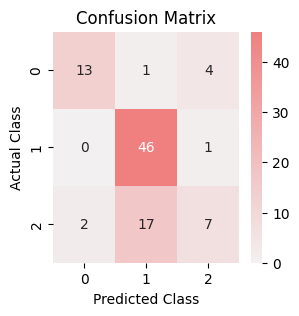


Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.72      0.79        18
    low risk       0.72      0.98      0.83        47
    mid risk       0.58      0.27      0.37        26

    accuracy                           0.73        91
   macro avg       0.72      0.66      0.66        91
weighted avg       0.71      0.73      0.69        91



In [374]:
conf_matrix_NB = confusion_matrix(y_test_scaled_nodup_org, y_pred_calibrated_test)

print("Confusion Matrix:")
print(conf_matrix_NB)

pastel_palette = sns.light_palette("lightcoral", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_NB, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

report_NB = classification_report(y_test_scaled_nodup_org, y_pred_calibrated_test)
print("\nClassification Report:")
print(report_NB)

Confusion Matrix:
[[ 63  13  18]
 [  2 176   9]
 [ 11  45  24]]


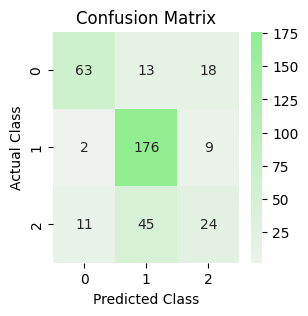


Classification Report:
              precision    recall  f1-score   support

   high risk       0.83      0.67      0.74        94
    low risk       0.75      0.94      0.84       187
    mid risk       0.47      0.30      0.37        80

    accuracy                           0.73       361
   macro avg       0.68      0.64      0.65       361
weighted avg       0.71      0.73      0.71       361



In [345]:
conf_matrix_NB_train = confusion_matrix(y_train_scaled_nodup_org, y_pred_calibrated_train)

print("Confusion Matrix:")
print(conf_matrix_NB_train)

pastel_palette = sns.light_palette("lightgreen", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_NB_train, annot=True, fmt="d", cmap=pastel_palette)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_train_scaled_nodup_org, y_pred_calibrated_train)
print("\nClassification Report:")
print(report)

The overall accuracies of both train and test are quite acciptable, but their performance on individual classes is too bad.

The model worked quite good with high risk class in testing set, but badly in training set (low recall)

For low risk the model worked perfectly in both training and testing sets.

The performance on the mid class is horrible in both training and testing.

So this model is not interesting especially in a health risk classification task, for its average performance on high risk and very bad performance on mid risk.

# 7. **SVM**

After multiple trials, we observed that, just like Naive Bayes, the performance of SVM is really bad in the prepared data set (with changes on the features and the data augmentation)

It's also sensitive to unscaled dataset in some cases.

So we decided to use the original dataset in the 4 formes as with Naive Bayes.

We start by grid search.

In [ ]:
SVM_model = SVC()

In [ ]:
SVM_param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [1],
    'degree': [2, 3, 4],
}

In [ ]:
SVM_grid_search = GridSearchCV(SVM_model, SVM_param_grid, cv=5, scoring='accuracy')

In [ ]:
# Fit the grid search to the training data
SVM_grid_search.fit(X_train_org, y_train_org)
SVM_original_best_model = SVM_grid_search.best_estimator_
SVM_original_best_params = SVM_grid_search.best_params_
SVM_original_best_score = SVM_grid_search.best_score_

print("Best Model score (original data):", SVM_original_best_score)
print("Best parameters (original data without duplications):", SVM_original_best_params)



# Fit the grid search to the training data
SVM_grid_search.fit(X_train_nodup_org, y_train_nodup_org)
SVM_original_nodup_best_model = SVM_grid_search.best_estimator_
SVM_original_nodup_best_params = SVM_grid_search.best_params_
SVM_original_nodup_best_score = SVM_grid_search.best_score_

print("\nBest Model score (original data without duplications):", SVM_original_nodup_best_score)
print("Best parameters (original data without duplications):", SVM_original_nodup_best_params)


# Fit the grid search to the training data
SVM_grid_search.fit(X_train_scaled_org, y_train_scaled_org)
SVM_scaled_best_model = SVM_grid_search.best_estimator_
SVM_scaled_best_params = SVM_grid_search.best_params_
SVM_scaled_best_score = SVM_grid_search.best_score_

print("\nBest Model score (scaled data):", SVM_scaled_best_score)
print("Best parameters (scaled data):", SVM_scaled_best_params)



# Fit the grid search to the training data
SVM_grid_search.fit(X_train_scaled_nodup_org, y_train_scaled_nodup_org)
SVM_scaled_nodup_best_model = SVM_grid_search.best_estimator_
SVM_scaled_nodup_best_params = SVM_grid_search.best_params_
SVM_scaled_nodup_best_score = SVM_grid_search.best_score_

print("\nBest Model score (scaled data without duplications):", SVM_scaled_nodup_best_score)
print("Best Model parameters (scaled data without duplications):", SVM_scaled_nodup_best_params)

Best Model score (original data): 0.685556312959176
Best parameters (original data without duplications): {'C': 1, 'degree': 4, 'kernel': 'poly'}

Best Model score (original data without duplications): 0.7090182648401828
Best parameters (original data without duplications): {'C': 1, 'degree': 4, 'kernel': 'poly'}

Best Model score (scaled data): 0.7015753995304097
Best parameters (scaled data): {'C': 1, 'degree': 2, 'kernel': 'rbf'}

Best Model score (scaled data without duplications): 0.6813546423135464
Best Model parameters (scaled data without duplications): {'C': 1, 'degree': 2, 'kernel': 'rbf'}


- all accuracies are low (around 0.66), the highest accuracy is 0.7 for unscaled dataset without duplicates
- We can manipulate this model a little more to try to get better accuracy, by tryin more fine tuning.

- After multiple runs, we see that kernal=poly is repetitive, so we choose it, and since poly works with degree, we will try multiple degrees.

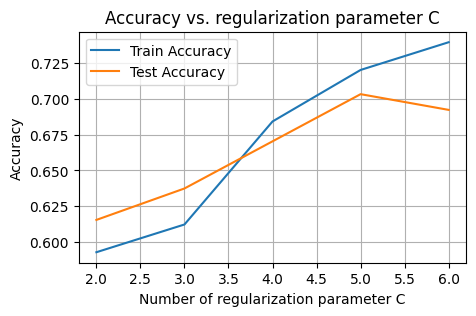

In [ ]:
train_accuracy = []
test_accuracy = []
deg = [2, 3, 4, 5, 6]
for d in deg:
    clf = SVC(C=0.2, kernel='poly', degree=d)
    clf.fit(X_train_nodup_org, y_train_nodup_org)

    train_accuracy.append(accuracy_score(y_train_nodup_org, clf.predict(X_train_nodup_org)))
    test_accuracy.append(accuracy_score(y_test_nodup_org, clf.predict(X_test_nodup_org)))

plt.figure(figsize=(5, 3))
plt.plot(deg, train_accuracy, label='Train Accuracy')
plt.plot(deg, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. regularization parameter C')
plt.xlabel('Number of regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Degree 5 gives the best accuracies.

Now we look for the most optimal regularization parameter C after fixing other hyperparameters on the chosen values.

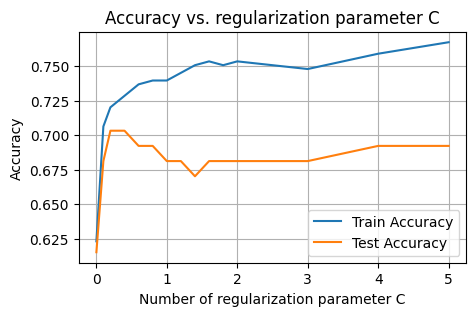

In [ ]:
train_accuracy = []
test_accuracy = []
C = [0.001, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 3, 4, 5]
for c in C:
    clf = SVC(C=c, kernel='poly', degree=5)
    clf.fit(X_train_nodup_org, y_train_nodup_org)

    train_accuracy.append(accuracy_score(y_train_nodup_org, clf.predict(X_train_nodup_org)))
    test_accuracy.append(accuracy_score(y_test_nodup_org, clf.predict(X_test_nodup_org)))

plt.figure(figsize=(5, 3))
plt.plot(C, train_accuracy, label='Train Accuracy')
plt.plot(C, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. regularization parameter C')
plt.xlabel('Number of regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The best SVM model for now is with C: 0.2 , kernels:poly, degree:5

In [ ]:
svm = SVC(C=0.2, kernel='poly', degree=5)

In [ ]:
svm.fit(X_train_nodup_org, y_train_nodup_org)
y_pred_svm_test  = svm.predict(X_test_nodup_org)
y_pred_svm_train = svm.predict(X_train_nodup_org)

svm_test_acc  = accuracy_score(y_pred_svm_test, y_test_nodup_org)
svm_train_acc = accuracy_score(y_pred_svm_train, y_train_nodup_org)

print("Train accuracy:", svm_train_acc)
print("Test accuracy:" , svm_test_acc)

y_pred_SVM = y_pred_svm_test

Train accuracy: 0.7202216066481995
Test accuracy: 0.7032967032967034


This model gave us an average result, but very low comparing to some previous models.

We try Bagging with the best SVM model to see if we can get better scores.

[0.6593406593406593, 0.6813186813186813, 0.6813186813186813, 0.6813186813186813, 0.6703296703296703, 0.6813186813186813, 0.6703296703296703, 0.7032967032967034, 0.7032967032967034, 0.6703296703296703, 0.6703296703296703, 0.6703296703296703, 0.7032967032967034, 0.6813186813186813, 0.6923076923076923, 0.6813186813186813, 0.6813186813186813, 0.6923076923076923, 0.6813186813186813, 0.7032967032967034, 0.6703296703296703, 0.6923076923076923, 0.6923076923076923, 0.6923076923076923, 0.6923076923076923]


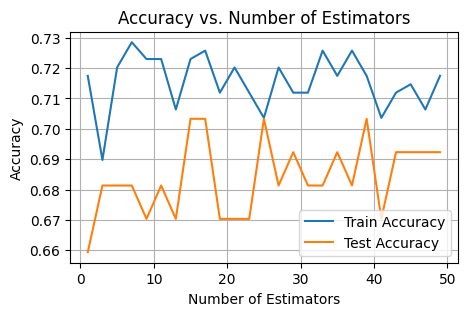

In [ ]:
train_accuracy = []
test_accuracy = []
n_estimators = range(1, 50, 2)
for n in n_estimators:
    clf = BaggingClassifier(estimator=svm, n_estimators=n, max_features=5, max_samples=0.8)
    clf.fit(X_train_nodup_org, y_train_nodup_org)
    train_accuracy.append(accuracy_score(y_train_nodup_org, clf.predict(X_train_nodup_org)))
    test_accuracy.append(accuracy_score(y_test_nodup_org, clf.predict(X_test_nodup_org)))
print(test_accuracy)
plt.figure(figsize=(5, 3))
plt.plot(n_estimators, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Bagging gives different results for each run, and the graph shows that the accurecy usinig is very random, and a parameter (n_estimator) for any value can give max 0.71 but it also may give 0.64, so this approach can't improve the SVM performanceat all.

- Evaluation (test)


Classification Report:
              precision    recall  f1-score   support

   high risk       0.89      0.89      0.89        18
    low risk       0.66      0.96      0.78        47
    mid risk       0.60      0.12      0.19        26

    accuracy                           0.70        91
   macro avg       0.72      0.65      0.62        91
weighted avg       0.69      0.70      0.64        91



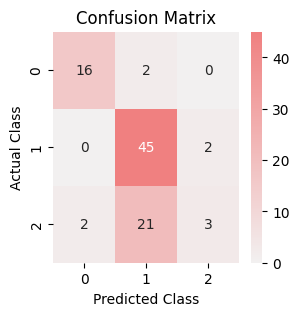

In [375]:
print("\nClassification Report:")
print(classification_report(y_test_nodup_org, y_pred_svm_test))

confusion_matrix_SVM = confusion_matrix(y_test_nodup_org, y_pred_svm_test)

pastel_palette = sns.light_palette("lightcoral", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_SVM, annot=True, fmt="d", cmap=pastel_palette)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()
classification_report_SVM = classification_report(y_test_nodup_org, y_pred_svm_test)

- Evaluation (train)


Classification Report:
              precision    recall  f1-score   support

   high risk       0.81      0.68      0.74        94
    low risk       0.70      0.97      0.81       187
    mid risk       0.67      0.17      0.28        80

    accuracy                           0.72       361
   macro avg       0.72      0.61      0.61       361
weighted avg       0.72      0.72      0.67       361



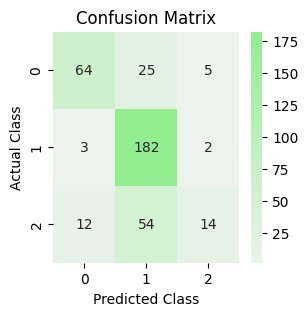

In [349]:
print("\nClassification Report:")
print(classification_report(y_train_nodup_org, y_pred_svm_train))

confusion_matrix_SVM_train = confusion_matrix(y_train_nodup_org, y_pred_svm_train)

pastel_palette = sns.light_palette("lightgreen", as_cmap=True)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix_SVM_train, annot=True, fmt="d", cmap=pastel_palette)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

The overall accuracies are not very good.

The model works differently between test and train sets on same classes, which suggest that the model is bad at generalization.

For high risk class: the model works very good in testing set but bad in training set (low recall, the model does not identify all the high risk instances)

For low risk, the model works perfectly in training set, but not in testing set (low precision, the model has too many false positives for this class)

For mid risk, the model works poorly with both.

# 8. Artificial Neural Networks


For ANN, we start by converting the target feature into a one-hot encoded format using the to_categorical.

In [354]:
y_train_scaled_categorical = to_categorical(y_train_scaled)
y_test_scaled_categorical = to_categorical(y_test_scaled)

print(y_train_scaled_categorical[:3])
print('\n',y_test_scaled_categorical[:3])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]

 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


And now we define our model, after multiple trials we conclude that the best ANN model in our case, is an ANN with a first layer with 128 neurons, followed by 2 hidden layers of 64, 32 neurons, and an output layer with 3 neurons (for 3 classes)

In [355]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Now we configure and compile the neural network model using Adam that computes individual adaptive learning rates for different parameters, whiwh allows the optimizer to perform well even with a high variance in gradients.

After trying different learning rates, we conclude that 0.002 can give sutisfying results

In [356]:
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               896       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 11331 (44.26 KB)
Trainable params: 11331 (44.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


To avoid overfitting, we use early stopping.

In [357]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=40,
    restore_best_weights=True
)

We look for the best epochs number, by:
- tracing the train and validation accuracy vs number of epochs
- tracing the model loss vs number of epochs
- tracing the test and train accuracies vs different numbers of epochs


In [358]:
history = model.fit(X_train_scaled, y_train_scaled_categorical, epochs=300, batch_size=32, validation_split=0.1, verbose=0, callbacks=[early_stopping])
train_loss, train_acc = model.evaluate(X_train_scaled, y_train_scaled_categorical, verbose=0)

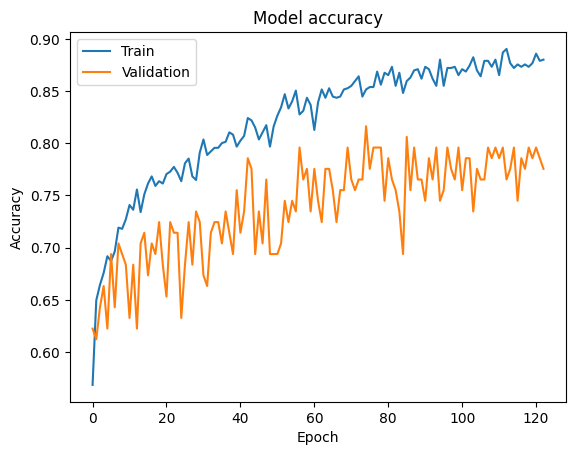

In [359]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

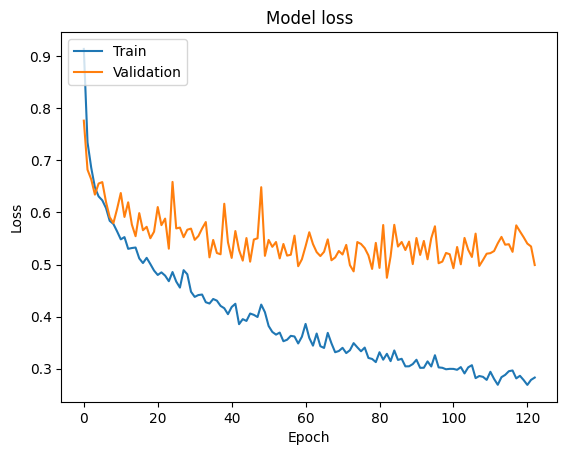

In [360]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

From these graphs, we see that our model can work perfectly with small epochs number (<100).

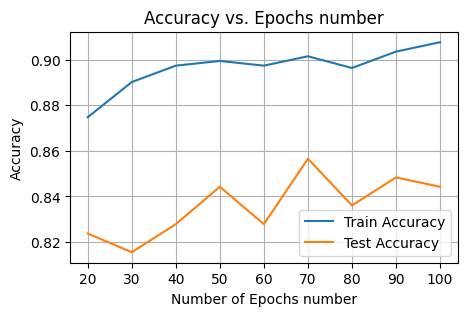

In [361]:
train_accuracy = []
test_accuracy = []
epochs = [20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in epochs:
    history = model.fit(X_train_scaled, y_train_scaled_categorical, epochs=n, batch_size=32, validation_split=0.1, verbose=0, callbacks=[early_stopping])
    train_loss, train_acc = model.evaluate(X_train_scaled, y_train_scaled_categorical, verbose=0)
    train_accuracy.append(train_acc)
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test_scaled_categorical, verbose=0)
    test_accuracy.append(test_acc)

plt.figure(figsize=(5, 3))
plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Epochs number')
plt.xlabel('Number of Epochs number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

We try some different batch sizes with selected epochs number

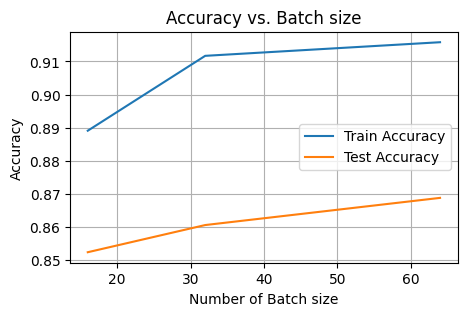

In [362]:
train_accuracy = []
test_accuracy = []
size = [16, 32, 64]
for n in size:
    history = model.fit(X_train_scaled, y_train_scaled_categorical, epochs=70, batch_size=n, validation_split=0.1, verbose=0, callbacks=[early_stopping])
    train_loss, train_acc = model.evaluate(X_train_scaled, y_train_scaled_categorical, verbose=0)
    train_accuracy.append(train_acc)
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test_scaled_categorical, verbose=0)
    test_accuracy.append(test_acc)

plt.figure(figsize=(5, 3))
plt.plot(size, train_accuracy, label='Train Accuracy')
plt.plot(size, test_accuracy, label='Test Accuracy')
plt.title('Accuracy vs. Batch size')
plt.xlabel('Number of Batch size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

- Remark: ANN is a stachastic model, so even for same hyperparameters, we will have different results foreach run, but in general for our chosen ANN, we have have testing accuracy ranging between 0.84 and 0.88, and test accuracy between 0.9 and 0.95, with small ratio between the two accuracies in each case (no overfitting)

From the obove tests, we see that it is safe to select a small number of epochs and a small batch size. This makes the model works faster, while ensuring good accuracies.

In [363]:
history = model.fit(X_train_scaled, y_train_scaled_categorical, epochs=70, batch_size=32, validation_split=0.1, verbose=0, callbacks=[early_stopping])

train_loss, train_acc = model.evaluate(X_train_scaled, y_train_scaled_categorical, verbose=0)
print('Train accuracy:', train_acc)

test_loss, test_acc = model.evaluate(X_test_scaled, y_test_scaled_categorical, verbose=0)
print('Test accuracy:', test_acc)

ann_score = test_acc

y_pred_prob = model.predict(X_test_scaled)
y_pred_ANN = np.argmax(y_pred_prob, axis=1)

print('Predictions:', y_pred_ANN)

Train accuracy: 0.9117043018341064
Test accuracy: 0.8565573692321777
8/8 [==============================] - 0s 4ms/step
Predictions: [1 1 0 2 2 0 2 2 2 0 0 1 2 0 1 1 1 0 2 2 1 2 2 0 0 1 0 1 2 2 2 2 0 1 0 1 2
 1 1 1 0 2 1 2 2 0 2 0 2 0 1 2 2 1 2 0 0 2 0 0 1 0 0 1 2 0 0 1 2 0 0 2 1 0
 0 1 2 0 0 0 0 2 1 1 0 2 1 2 0 0 2 0 1 0 0 0 2 2 1 2 0 2 2 2 0 1 0 0 0 2 2
 0 0 1 1 1 0 0 2 0 1 1 1 1 2 1 2 0 1 0 1 0 1 1 1 1 0 2 0 0 2 1 2 2 1 0 1 0
 1 0 1 0 1 1 2 1 2 0 0 1 1 0 0 0 2 0 1 1 1 0 2 1 2 2 2 0 1 2 0 0 2 2 0 2 1
 0 0 2 0 2 1 1 1 2 0 1 1 2 0 2 1 1 0 0 2 2 1 0 1 0 1 2 0 2 2 0 1 0 1 2 0 0
 1 1 1 1 2 1 1 1 0 1 1 2 2 1 1 0 2 0 1 0 1 1]


- Evaluation (test)

8/8 [==============================] - 0s 3ms/step
Test accuracy: 0.8565573770491803


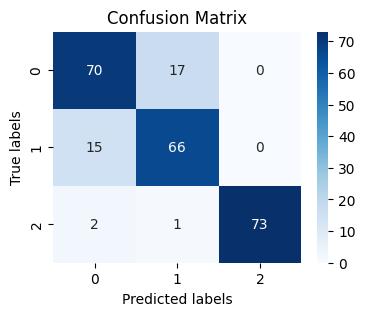


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.79      0.81      0.80        81
           2       1.00      0.96      0.98        76

    accuracy                           0.86       244
   macro avg       0.86      0.86      0.86       244
weighted avg       0.86      0.86      0.86       244



In [376]:
y_pred_test = model.predict(X_test_scaled)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

y_test_original = np.argmax(y_test_scaled_categorical, axis=1)

test_accuracy = accuracy_score(y_test_original, y_pred_test_classes)
print('Test accuracy:', test_accuracy)

conf_matrix_ANN = confusion_matrix(y_test_original, y_pred_test_classes)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_ANN, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_test_classes))

classification_report_ANN = classification_report(y_test_original, y_pred_test_classes)

- Evaluation (train)

31/31 [==============================] - 0s 3ms/step
Test accuracy: 0.9117043121149897


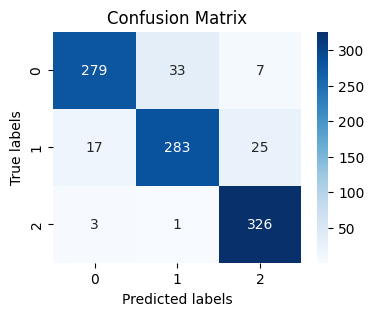


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       319
           1       0.89      0.87      0.88       325
           2       0.91      0.99      0.95       330

    accuracy                           0.91       974
   macro avg       0.91      0.91      0.91       974
weighted avg       0.91      0.91      0.91       974



array([[288,  25,   6],
       [ 14, 291,  20],
       [  3,   4, 323]])

In [366]:
y_pred_train = model.predict(X_train_scaled)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)

y_train_original = np.argmax(y_train_scaled_categorical, axis=1)

train_accuracy = accuracy_score(y_train_original, y_pred_train_classes)
print('Test accuracy:', train_accuracy)

conf_matrix_ANN_train = confusion_matrix(y_train_original, y_pred_train_classes)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_ANN_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_train_original, y_pred_train_classes))

conf_matrix

# Comparative Analysis and Discussion

## Testing and training accuracies

We start by a general comparaison, between models test and train accuracies.

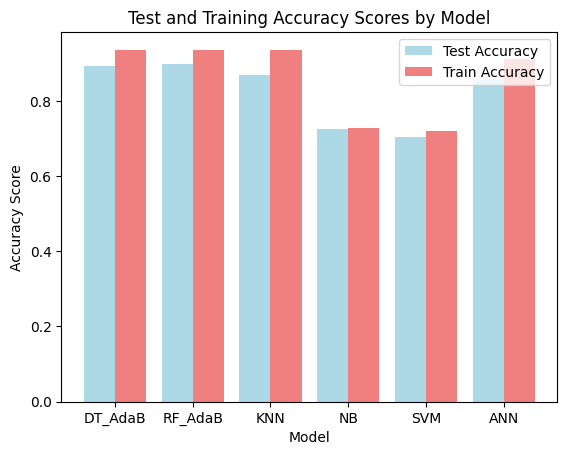

In [367]:
models = ['DT_AdaB', 'RF_AdaB', 'KNN', 'NB', 'SVM', 'ANN']

test_accuracy_scores = [test_score_adaboost_DT, test_acc_adaboost_RF, test_score_KNN, calibrated_test_accuracy, svm_test_acc, test_acc]
training_accuracy_scores = [train_score_adaboost_DT, train_acc_adaboost_RF, train_score_KNN, calibrated_train_accuracy, svm_train_acc, train_acc]

n_models = len(models)
index = np.arange(n_models)
bar_width = 0.4

fig, ax = plt.subplots()

bar1 = ax.bar(index, test_accuracy_scores, bar_width, label='Test Accuracy', color='lightblue')

bar2 = ax.bar(index + bar_width, training_accuracy_scores, bar_width, label='Train Accuracy', color='lightcoral')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')
ax.set_title('Test and Training Accuracy Scores by Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()

Firs remark, is that we don't have any remarkable overfitting with any of the models.

Second, remark is that all DT with adaboost, RF with adaboost, KNN, ANN all give very good results, while NB and SVM give poor results.

We can order the models according to their performance as follows:
 - RF with adaboost
 - DT with adaboost
 - ANN
 - KNN
 - NB
 - SVM

## Confusion martices

In [369]:
print('Confusion matrix for DT with adaboost: \n', confusion_matrix_result_DT)
print('\nConfusion matrix for RF with adaboost: \n', confusion_matrix_result_adaboost_RF)
print('\nConfusion matrix for KNN: \n', confusion_matrix_result_KNN)
print('\nConfusion matrix for NB with adaboost: \n', conf_matrix_NB)
print('\nConfusion matrix for SVM: \n', confusion_matrix_SVM)
print('\nConfusion matrix for ANN: \n', conf_matrix_ANN)

Confusion matrix for DT with adaboost: 
 [[74 13  0]
 [ 6 73  2]
 [ 1  4 71]]

Confusion matrix for RF with adaboost: 
 [[72 15  0]
 [ 8 73  0]
 [ 1  1 74]]

Confusion matrix for KNN: 
 [[69 17  1]
 [ 8 73  0]
 [ 3  3 70]]

Confusion matrix for NB with adaboost: 
 [[13  1  4]
 [ 0 46  1]
 [ 2 17  7]]

Confusion matrix for SVM: 
 [[16  2  0]
 [ 0 45  2]
 [ 2 21  3]]

Confusion matrix for ANN: 
 [[70 17  0]
 [15 66  0]
 [ 2  1 73]]


- Comment

  - Decision Tree:

    The DT model has relatively balanced confusion matrix with some misclassifications across classes.
    
    It predicts high-risk instances fairly accurately but struggles slightly with distinguishing between low and mid-risk cases.

  - Random Forest:
    
    RF shows a similar pattern to DT with slightly improved accuracy.
    
    It also performs well in identifying high-risk cases but has some confusion between low and mid-risk categories.

  - K-Nearest Neighbors:
    
    KNN exhibits more confusion, particularly between low and mid-risk classes.

    It tends to misclassify mid-risk instances as low-risk and vice versa.

  - Naive Bayes:
    
    NB demonstrates a higher tendency to misclassify instances across all classes.
    
    It struggles notably with mid-risk instances, often classifying them as either low or high risk.

  - Support Vector Machine:
    
    SVM shows a mixed performance with relatively accurate predictions for high-risk cases but less accuracy in distinguishing between low and mid-risk instances.

  - Artificial Neural Network:

    ANN performs similarly to RF and DT, with good accuracy in predicting high-risk cases but some confusion between low and mid-risk categories.

- Observations Linked to our Case Study:

  The models generally perform well in predicting high-risk cases, which aligns with the primary focus of our study. However, the misclassification between low and mid-risk instances indicates areas for improvement in model sensitivity and specificity.

  These misclassifications could be due to the complexity of the underlying relationships between risk factors in maternal health. Further feature engineering or incorporating additional data could potentially enhance model performance and reduce misclassifications, ensuring more accurate risk assessments for maternal health.

## Classification Repports

In [380]:
print('Classification Repport for DT with adaboost:\n ------------------------------------------\n', classification_report_DT)
print('\nClassification Repport for RF with adaboost:\n ------------------------------------------\n', classification_report_RF)
print('\nClassification Repport for KNN:\n -----------------------------------\n', classification_report_KNN)
print('\nClassification Repport for NB:\n ------------------------------------\n', report_NB)
print('\nClassification Repport for SVM:\n -----------------------------------\n', classification_report_SVM)
print('\nClassification Repport for ANN:\n -----------------------------------\n', classification_report_ANN)

Classification Repport for DT with adaboost:
 ------------------------------------------
               precision    recall  f1-score   support

           0       0.87      0.78      0.82        87
           1       0.74      0.85      0.79        81
           2       0.97      0.93      0.95        76

    accuracy                           0.85       244
   macro avg       0.86      0.86      0.86       244
weighted avg       0.86      0.85      0.85       244


Classification Repport for RF with adaboost:
 ------------------------------------------
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        87
           1       0.82      0.90      0.86        81
           2       1.00      0.97      0.99        76

    accuracy                           0.90       244
   macro avg       0.90      0.90      0.90       244
weighted avg       0.90      0.90      0.90       244


Classification Repport for KNN:
 -----------------------

- Precision, Recall, and F1-Score:
  
  - Decision Tree and Random Forest show high precision, recall, and F1-scores across all classes, indicating robust performance in identifying maternal health risk levels.

  - K-Nearest Neighbors (KNN) exhibits slightly lower performance compared to tree-based models, particularly in recall for mid-risk cases.

  - Naive Bayes and Support Vector Machine (SVM) demonstrate lower precision, recall, and F1-scores, especially for mid-risk cases, suggesting challenges in accurately predicting this class.

  - Artificial Neural Network (ANN) achieves high precision, recall, and F1-scores similar to tree-based models, indicating its effectiveness in classifying maternal health risks.

- Link to Case Study:
  
  The consistent misclassifications of mid-risk cases across models underscore the complexity in accurately assessing maternal health risks, especially for cases with moderate risk levels.

  These findings emphasize the importance of further research and data collection efforts to better understand the factors contributing to mid-risk classifications and improve model performance in this critical area.

  Addressing the challenges in mid-risk classification is crucial for enhancing maternal healthcare interventions and reducing maternal mortality rates, aligning with the goals of sustainable development initiatives such as the United Nations' Sustainable Development Goals (SDGs).

  In summary, while the models exhibit varying levels of performance, particularly in predicting mid-risk cases, their overall effectiveness in identifying maternal health risks underscores the potential for machine learning to contribute to improving maternal healthcare outcomes. Continued refinement and validation of these models are essential for advancing maternal health risk assessment and intervention strategies.

## Conclusion

In conclusion, after a comprehensive evaluation of various machine learning models for maternal health risk classification, we can rank their performance as follows:

- Decision Tree and Random Forest demonstrate robust performance, achieving high precision, recall, and F1-scores across all risk levels. They exhibit consistent accuracy in predicting maternal health risks, with minimal misclassifications.

- Artificial Neural Network (ANN) also performs admirably, with precision, recall, and F1-scores comparable to tree-based models. Its effectiveness in classifying maternal health risks highlights its potential as a reliable predictive tool.

- K-Nearest Neighbors (KNN) shows slightly lower performance compared to tree-based and neural network models, particularly in identifying mid-risk cases. While its performance is respectable, it may benefit from further optimization to enhance its accuracy.

- Naive Bayes and Support Vector Machine (SVM) exhibit lower precision, recall, and F1-scores, indicating challenges in accurately predicting maternal health risks. They may require additional feature engineering or model refinement to improve their performance.